In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave, imshow

from skimage.measure import label
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.viewer import ImageViewer
from skimage.morphology import binary_dilation
from scipy import ndimage as ndi

import cv2
from natsort import natsorted


/home/nathan/anaconda3/lib/python3.7/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


### Image path

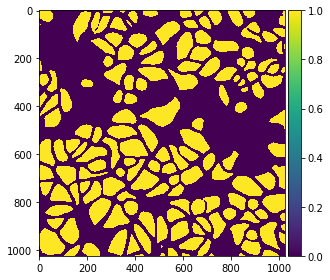

In [157]:
image_path = os.path.normpath("/home/nathan/analysis/seg_tidy/")
image_name = "s_0.tif"
image = imread(os.path.normpath(os.path.join(image_path, image_name)))
imshow(image)

## backgroud preservation idea
### if the number of masks decreases between frames (ie merged cells), take the previous frame and carry the background over (via multiplication of images)

In [14]:
image_path = "/home/nathan/data/fucci/other_mask_data/labels_v5/"
output_dir = '/home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/'
image_list = [m for m in os.listdir(image_path) if m.endswith('.tif')]

image_list = natsorted(image_list)
i = 0
for i, image_name in enumerate(image_list):
    
    seg = imread(os.path.normpath(os.path.join(image_path, image_name)))
    L, n = label(seg, connectivity=2, return_num = True)
    image_name_next = image_list[i+1]
    seg_next = imread(os.path.normpath(os.path.join(image_path, image_name_next)))
    L_next, n_next = label(seg_next, connectivity=2, return_num = True)
    
    print(image_name, image_name_next, "start comparison")
    print("n1, n2 = ", n, n_next)
    if n > n_next:
        seg_output = seg * seg_next
        print("Rewriting", image_name_next)
    else:
        seg_output = seg_next
        print("Leaving", image_name_next, "as is")

        
    output_fn = os.path.join(output_dir, image_name_next)
    imsave(output_fn, seg_output)
    print(image_name_next, "saved")

# for image_name in image_list:
#     segmentation = imread(os.path.normpath(os.path.join(image_path, image_name)))
#     labels = list(np.unique(segmentation).astype(np.int))
#     label(segmentation)

s_0.tif s_1.tif start comparison
n1, n2 =  163 165
Leaving s_1.tif as is
s_1.tif saved
s_1.tif s_2.tif start comparison
n1, n2 =  165 172
Leaving s_2.tif as is
s_2.tif saved
s_2.tif s_3.tif start comparison
n1, n2 =  172 173
Leaving s_3.tif as is
s_3.tif saved
s_3.tif s_4.tif start comparison
n1, n2 =  173 163
Rewriting s_4.tif
s_4.tif saved
s_4.tif s_5.tif start comparison
n1, n2 =  163 164
Leaving s_5.tif as is
s_5.tif saved
s_5.tif s_6.tif start comparison
n1, n2 =  164 165
Leaving s_6.tif as is
s_6.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_2.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_3.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_4.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_5.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarn

s_6.tif s_7.tif start comparison
n1, n2 =  165 160
Rewriting s_7.tif
s_7.tif saved
s_7.tif s_8.tif start comparison
n1, n2 =  160 166
Leaving s_8.tif as is
s_8.tif saved
s_8.tif s_9.tif start comparison
n1, n2 =  166 162
Rewriting s_9.tif
s_9.tif saved
s_9.tif s_10.tif start comparison
n1, n2 =  162 163
Leaving s_10.tif as is
s_10.tif saved
s_10.tif s_11.tif start comparison
n1, n2 =  163 155
Rewriting s_11.tif
s_11.tif saved
s_11.tif s_12.tif start comparison
n1, n2 =  155 160
Leaving s_12.tif as is
s_12.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_7.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_8.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_9.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_10.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_11.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWa

s_12.tif s_13.tif start comparison
n1, n2 =  160 158
Rewriting s_13.tif
s_13.tif saved
s_13.tif s_14.tif start comparison
n1, n2 =  158 159
Leaving s_14.tif as is
s_14.tif saved
s_14.tif s_15.tif start comparison
n1, n2 =  159 157
Rewriting s_15.tif
s_15.tif saved
s_15.tif s_16.tif start comparison
n1, n2 =  157 153
Rewriting s_16.tif
s_16.tif saved
s_16.tif s_17.tif start comparison
n1, n2 =  153 156
Leaving s_17.tif as is
s_17.tif saved
s_17.tif s_18.tif start comparison
n1, n2 =  156 157
Leaving s_18.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_13.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_14.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_15.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_16.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_17.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Use

s_18.tif saved
s_18.tif s_19.tif start comparison
n1, n2 =  157 161
Leaving s_19.tif as is
s_19.tif saved
s_19.tif s_20.tif start comparison
n1, n2 =  161 165
Leaving s_20.tif as is
s_20.tif saved
s_20.tif s_21.tif start comparison
n1, n2 =  165 167
Leaving s_21.tif as is
s_21.tif saved
s_21.tif s_22.tif start comparison
n1, n2 =  167 159
Rewriting s_22.tif
s_22.tif saved
s_22.tif s_23.tif start comparison
n1, n2 =  159 169
Leaving s_23.tif as is
s_23.tif saved
s_23.tif s_24.tif start comparison
n1, n2 =  169 165
Rewriting s_24.tif
s_24.tif saved
s_24.tif s_25.tif start comparison
n1, n2 =  165 168
Leaving s_25.tif as is
s_25.tif saved
s_25.tif s_26.tif start comparison
n1, n2 =  168 172
Leaving s_26.tif as is
s_26.tif saved
s_26.tif s_27.tif start comparison
n1, n2 =  172 167
Rewriting s_27.tif
s_27.tif saved
s_27.tif s_28.tif start comparison
n1, n2 =  167 171
Leaving s_28.tif as is
s_28.tif saved
s_28.tif s_29.tif start comparison
n1, n2 =  171 162
Rewriting s_29.tif
s_29.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_24.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_25.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_26.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_27.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_28.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Use

s_29.tif s_30.tif start comparison
n1, n2 =  162 166
Leaving s_30.tif as is
s_30.tif saved
s_30.tif s_31.tif start comparison
n1, n2 =  166 161
Rewriting s_31.tif
s_31.tif saved
s_31.tif s_32.tif start comparison
n1, n2 =  161 160
Rewriting s_32.tif
s_32.tif saved
s_32.tif s_33.tif start comparison
n1, n2 =  160 165
Leaving s_33.tif as is
s_33.tif saved
s_33.tif s_34.tif start comparison
n1, n2 =  165 162
Rewriting s_34.tif
s_34.tif saved
s_34.tif s_35.tif start comparison
n1, n2 =  162 162
Leaving s_35.tif as is
s_35.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_30.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_31.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_32.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_33.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_34.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Use

s_35.tif s_36.tif start comparison
n1, n2 =  162 167
Leaving s_36.tif as is
s_36.tif saved
s_36.tif s_37.tif start comparison
n1, n2 =  167 160
Rewriting s_37.tif
s_37.tif saved
s_37.tif s_38.tif start comparison
n1, n2 =  160 160
Leaving s_38.tif as is
s_38.tif saved
s_38.tif s_39.tif start comparison
n1, n2 =  160 166
Leaving s_39.tif as is
s_39.tif saved
s_39.tif s_40.tif start comparison
n1, n2 =  166 166
Leaving s_40.tif as is
s_40.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_36.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_37.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_38.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_39.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_40.tif is a low contrast image


s_40.tif s_41.tif start comparison
n1, n2 =  166 163
Rewriting s_41.tif
s_41.tif saved
s_41.tif s_42.tif start comparison
n1, n2 =  163 161
Rewriting s_42.tif
s_42.tif saved
s_42.tif s_43.tif start comparison
n1, n2 =  161 162
Leaving s_43.tif as is
s_43.tif saved
s_43.tif s_44.tif start comparison
n1, n2 =  162 160
Rewriting s_44.tif
s_44.tif saved
s_44.tif s_45.tif start comparison
n1, n2 =  160 169
Leaving s_45.tif as is
s_45.tif saved
s_45.tif s_46.tif start comparison
n1, n2 =  169 167
Rewriting s_46.tif
s_46.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_41.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_42.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_43.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_44.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_45.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Use

s_46.tif s_47.tif start comparison
n1, n2 =  167 163
Rewriting s_47.tif
s_47.tif saved
s_47.tif s_48.tif start comparison
n1, n2 =  163 168
Leaving s_48.tif as is
s_48.tif saved
s_48.tif s_49.tif start comparison
n1, n2 =  168 167
Rewriting s_49.tif
s_49.tif saved
s_49.tif s_50.tif start comparison
n1, n2 =  167 166
Rewriting s_50.tif
s_50.tif saved
s_50.tif s_51.tif start comparison
n1, n2 =  166 168
Leaving s_51.tif as is
s_51.tif saved
s_51.tif s_52.tif start comparison
n1, n2 =  168 162
Rewriting s_52.tif
s_52.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_47.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_48.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_49.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_50.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_51.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Use

s_52.tif s_53.tif start comparison
n1, n2 =  162 160
Rewriting s_53.tif
s_53.tif saved
s_53.tif s_54.tif start comparison
n1, n2 =  160 167
Leaving s_54.tif as is
s_54.tif saved
s_54.tif s_55.tif start comparison
n1, n2 =  167 168
Leaving s_55.tif as is
s_55.tif saved
s_55.tif s_56.tif start comparison
n1, n2 =  168 170
Leaving s_56.tif as is
s_56.tif saved
s_56.tif s_57.tif start comparison
n1, n2 =  170 168
Rewriting s_57.tif
s_57.tif saved
s_57.tif s_58.tif start comparison
n1, n2 =  168 171
Leaving s_58.tif as is
s_58.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_53.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_54.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_55.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_56.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_57.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Use

s_58.tif s_59.tif start comparison
n1, n2 =  171 166
Rewriting s_59.tif
s_59.tif saved
s_59.tif s_60.tif start comparison
n1, n2 =  166 172
Leaving s_60.tif as is
s_60.tif saved
s_60.tif s_61.tif start comparison
n1, n2 =  172 170
Rewriting s_61.tif
s_61.tif saved
s_61.tif s_62.tif start comparison
n1, n2 =  170 162
Rewriting s_62.tif
s_62.tif saved
s_62.tif s_63.tif start comparison
n1, n2 =  162 167
Leaving s_63.tif as is
s_63.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_59.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_60.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_61.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_62.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_63.tif is a low contrast image


s_63.tif s_64.tif start comparison
n1, n2 =  167 168
Leaving s_64.tif as is
s_64.tif saved
s_64.tif s_65.tif start comparison
n1, n2 =  168 169
Leaving s_65.tif as is
s_65.tif saved
s_65.tif s_66.tif start comparison
n1, n2 =  169 168
Rewriting s_66.tif
s_66.tif saved
s_66.tif s_67.tif start comparison
n1, n2 =  168 162
Rewriting s_67.tif
s_67.tif saved
s_67.tif s_68.tif start comparison
n1, n2 =  162 158
Rewriting s_68.tif
s_68.tif saved
s_68.tif s_69.tif start comparison
n1, n2 =  158 151
Rewriting s_69.tif
s_69.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_64.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_65.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_66.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_67.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_68.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Use

s_69.tif s_70.tif start comparison
n1, n2 =  151 159
Leaving s_70.tif as is
s_70.tif saved
s_70.tif s_71.tif start comparison
n1, n2 =  159 168
Leaving s_71.tif as is
s_71.tif saved
s_71.tif s_72.tif start comparison
n1, n2 =  168 159
Rewriting s_72.tif
s_72.tif saved
s_72.tif s_73.tif start comparison
n1, n2 =  159 167
Leaving s_73.tif as is
s_73.tif saved
s_73.tif s_74.tif start comparison
n1, n2 =  167 164
Rewriting s_74.tif
s_74.tif saved
s_74.tif s_75.tif start comparison
n1, n2 =  164 170
Leaving s_75.tif as is
s_75.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_70.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_71.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_72.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_73.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_74.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Use

s_75.tif s_76.tif start comparison
n1, n2 =  170 174
Leaving s_76.tif as is
s_76.tif saved
s_76.tif s_77.tif start comparison
n1, n2 =  174 170
Rewriting s_77.tif
s_77.tif saved
s_77.tif s_78.tif start comparison
n1, n2 =  170 178
Leaving s_78.tif as is
s_78.tif saved
s_78.tif s_79.tif start comparison
n1, n2 =  178 178
Leaving s_79.tif as is
s_79.tif saved
s_79.tif s_80.tif start comparison
n1, n2 =  178 176
Rewriting s_80.tif
s_80.tif saved
s_80.tif s_81.tif start comparison
n1, n2 =  176 174
Rewriting s_81.tif
s_81.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_76.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_77.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_78.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_79.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_80.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Use

s_81.tif s_82.tif start comparison
n1, n2 =  174 166
Rewriting s_82.tif
s_82.tif saved
s_82.tif s_83.tif start comparison
n1, n2 =  166 171
Leaving s_83.tif as is
s_83.tif saved
s_83.tif s_84.tif start comparison
n1, n2 =  171 175
Leaving s_84.tif as is
s_84.tif saved
s_84.tif s_85.tif start comparison
n1, n2 =  175 172
Rewriting s_85.tif
s_85.tif saved
s_85.tif s_86.tif start comparison
n1, n2 =  172 180
Leaving s_86.tif as is
s_86.tif saved
s_86.tif s_87.tif start comparison
n1, n2 =  180 180
Leaving s_87.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_82.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_83.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_84.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_85.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_86.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Use

s_87.tif saved
s_87.tif s_88.tif start comparison
n1, n2 =  180 182
Leaving s_88.tif as is
s_88.tif saved
s_88.tif s_89.tif start comparison
n1, n2 =  182 181
Rewriting s_89.tif
s_89.tif saved
s_89.tif s_90.tif start comparison
n1, n2 =  181 181
Leaving s_90.tif as is
s_90.tif saved
s_90.tif s_91.tif start comparison
n1, n2 =  181 182
Leaving s_91.tif as is
s_91.tif saved
s_91.tif s_92.tif start comparison
n1, n2 =  182 188
Leaving s_92.tif as is
s_92.tif saved
s_92.tif s_93.tif start comparison
n1, n2 =  188 185
Rewriting s_93.tif
s_93.tif saved
s_93.tif s_94.tif start comparison
n1, n2 =  185 179
Rewriting s_94.tif
s_94.tif saved
s_94.tif s_95.tif start comparison
n1, n2 =  179 176
Rewriting s_95.tif
s_95.tif saved
s_95.tif s_96.tif start comparison
n1, n2 =  176 183
Leaving s_96.tif as is
s_96.tif saved
s_96.tif s_97.tif start comparison
n1, n2 =  183 180
Rewriting s_97.tif
s_97.tif saved
s_97.tif s_98.tif start comparison
n1, n2 =  180 189
Leaving s_98.tif as is
s_98.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_93.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_94.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_95.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_96.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_97.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Use

s_98.tif s_99.tif start comparison
n1, n2 =  189 198
Leaving s_99.tif as is
s_99.tif saved
s_99.tif s_100.tif start comparison
n1, n2 =  198 198
Leaving s_100.tif as is
s_100.tif saved
s_100.tif s_101.tif start comparison
n1, n2 =  198 198
Leaving s_101.tif as is
s_101.tif saved
s_101.tif s_102.tif start comparison
n1, n2 =  198 199
Leaving s_102.tif as is
s_102.tif saved
s_102.tif s_103.tif start comparison
n1, n2 =  199 191
Rewriting s_103.tif
s_103.tif saved
s_103.tif s_104.tif start comparison
n1, n2 =  191 186
Rewriting s_104.tif
s_104.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_99.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_100.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_101.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_102.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_103.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26:

s_104.tif s_105.tif start comparison
n1, n2 =  186 184
Rewriting s_105.tif
s_105.tif saved
s_105.tif s_106.tif start comparison
n1, n2 =  184 178
Rewriting s_106.tif
s_106.tif saved
s_106.tif s_107.tif start comparison
n1, n2 =  178 185
Leaving s_107.tif as is
s_107.tif saved
s_107.tif s_108.tif start comparison
n1, n2 =  185 185
Leaving s_108.tif as is
s_108.tif saved
s_108.tif s_109.tif start comparison
n1, n2 =  185 188
Leaving s_109.tif as is
s_109.tif saved
s_109.tif s_110.tif start comparison
n1, n2 =  188 185
Rewriting s_110.tif
s_110.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_105.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_106.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_107.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_108.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_109.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26

s_110.tif s_111.tif start comparison
n1, n2 =  185 182
Rewriting s_111.tif
s_111.tif saved
s_111.tif s_112.tif start comparison
n1, n2 =  182 184
Leaving s_112.tif as is
s_112.tif saved
s_112.tif s_113.tif start comparison
n1, n2 =  184 188
Leaving s_113.tif as is
s_113.tif saved
s_113.tif s_114.tif start comparison
n1, n2 =  188 191
Leaving s_114.tif as is
s_114.tif saved
s_114.tif s_115.tif start comparison
n1, n2 =  191 189
Rewriting s_115.tif
s_115.tif saved
s_115.tif s_116.tif start comparison
n1, n2 =  189 191
Leaving s_116.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_111.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_112.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_113.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_114.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_115.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26

s_116.tif saved
s_116.tif s_117.tif start comparison
n1, n2 =  191 190
Rewriting s_117.tif
s_117.tif saved
s_117.tif s_118.tif start comparison
n1, n2 =  190 192
Leaving s_118.tif as is
s_118.tif saved
s_118.tif s_119.tif start comparison
n1, n2 =  192 187
Rewriting s_119.tif
s_119.tif saved
s_119.tif s_120.tif start comparison
n1, n2 =  187 192
Leaving s_120.tif as is
s_120.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_117.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_118.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_119.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_120.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_121.tif is a low contrast image


s_120.tif s_121.tif start comparison
n1, n2 =  192 188
Rewriting s_121.tif
s_121.tif saved
s_121.tif s_122.tif start comparison
n1, n2 =  188 187
Rewriting s_122.tif
s_122.tif saved
s_122.tif s_123.tif start comparison
n1, n2 =  187 188
Leaving s_123.tif as is
s_123.tif saved
s_123.tif s_124.tif start comparison
n1, n2 =  188 186
Rewriting s_124.tif
s_124.tif saved
s_124.tif s_125.tif start comparison
n1, n2 =  186 184
Rewriting s_125.tif
s_125.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_122.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_123.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_124.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_125.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_126.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26

s_125.tif s_126.tif start comparison
n1, n2 =  184 188
Leaving s_126.tif as is
s_126.tif saved
s_126.tif s_127.tif start comparison
n1, n2 =  188 190
Leaving s_127.tif as is
s_127.tif saved
s_127.tif s_128.tif start comparison
n1, n2 =  190 192
Leaving s_128.tif as is
s_128.tif saved
s_128.tif s_129.tif start comparison
n1, n2 =  192 192
Leaving s_129.tif as is
s_129.tif saved
s_129.tif s_130.tif start comparison
n1, n2 =  192 193
Leaving s_130.tif as is
s_130.tif saved
s_130.tif s_131.tif start comparison
n1, n2 =  193 185
Rewriting s_131.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_128.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_129.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_130.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_131.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_132.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26

s_131.tif saved
s_131.tif s_132.tif start comparison
n1, n2 =  185 187
Leaving s_132.tif as is
s_132.tif saved
s_132.tif s_133.tif start comparison
n1, n2 =  187 188
Leaving s_133.tif as is
s_133.tif saved
s_133.tif s_134.tif start comparison
n1, n2 =  188 189
Leaving s_134.tif as is
s_134.tif saved
s_134.tif s_135.tif start comparison
n1, n2 =  189 193
Leaving s_135.tif as is
s_135.tif saved
s_135.tif s_136.tif start comparison
n1, n2 =  193 192
Rewriting s_136.tif
s_136.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_134.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_135.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_136.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_137.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_138.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26

s_136.tif s_137.tif start comparison
n1, n2 =  192 187
Rewriting s_137.tif
s_137.tif saved
s_137.tif s_138.tif start comparison
n1, n2 =  187 191
Leaving s_138.tif as is
s_138.tif saved
s_138.tif s_139.tif start comparison
n1, n2 =  191 193
Leaving s_139.tif as is
s_139.tif saved
s_139.tif s_140.tif start comparison
n1, n2 =  193 194
Leaving s_140.tif as is
s_140.tif saved
s_140.tif s_141.tif start comparison
n1, n2 =  194 186
Rewriting s_141.tif
s_141.tif saved
s_141.tif s_142.tif start comparison
n1, n2 =  186 188
Leaving s_142.tif as is
s_142.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_140.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_141.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_142.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_143.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_144.tif is a low contrast image


s_142.tif s_143.tif start comparison
n1, n2 =  188 186
Rewriting s_143.tif
s_143.tif saved
s_143.tif s_144.tif start comparison
n1, n2 =  186 189
Leaving s_144.tif as is
s_144.tif saved
s_144.tif s_145.tif start comparison
n1, n2 =  189 191
Leaving s_145.tif as is
s_145.tif saved
s_145.tif s_146.tif start comparison
n1, n2 =  191 185
Rewriting s_146.tif
s_146.tif saved
s_146.tif s_147.tif start comparison
n1, n2 =  185 189
Leaving s_147.tif as is
s_147.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_145.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_146.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_147.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_148.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_149.tif is a low contrast image


s_147.tif s_148.tif start comparison
n1, n2 =  189 190
Leaving s_148.tif as is
s_148.tif saved
s_148.tif s_149.tif start comparison
n1, n2 =  190 193
Leaving s_149.tif as is
s_149.tif saved
s_149.tif s_150.tif start comparison
n1, n2 =  193 186
Rewriting s_150.tif
s_150.tif saved
s_150.tif s_151.tif start comparison
n1, n2 =  186 187
Leaving s_151.tif as is
s_151.tif saved
s_151.tif s_152.tif start comparison
n1, n2 =  187 185
Rewriting s_152.tif
s_152.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_150.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_151.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_152.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_153.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_154.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26

s_152.tif s_153.tif start comparison
n1, n2 =  185 189
Leaving s_153.tif as is
s_153.tif saved
s_153.tif s_154.tif start comparison
n1, n2 =  189 190
Leaving s_154.tif as is
s_154.tif saved
s_154.tif s_155.tif start comparison
n1, n2 =  190 190
Leaving s_155.tif as is
s_155.tif saved
s_155.tif s_156.tif start comparison
n1, n2 =  190 198
Leaving s_156.tif as is
s_156.tif saved
s_156.tif s_157.tif start comparison
n1, n2 =  198 187
Rewriting s_157.tif
s_157.tif saved
s_157.tif s_158.tif start comparison
n1, n2 =  187 195
Leaving s_158.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_156.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_157.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_158.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_159.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_160.tif is a low contrast image


s_158.tif saved
s_158.tif s_159.tif start comparison
n1, n2 =  195 191
Rewriting s_159.tif
s_159.tif saved
s_159.tif s_160.tif start comparison
n1, n2 =  191 197
Leaving s_160.tif as is
s_160.tif saved
s_160.tif s_161.tif start comparison
n1, n2 =  197 186
Rewriting s_161.tif
s_161.tif saved
s_161.tif s_162.tif start comparison
n1, n2 =  186 189
Leaving s_162.tif as is
s_162.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_161.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_162.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_163.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_164.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_165.tif is a low contrast image


s_162.tif s_163.tif start comparison
n1, n2 =  189 188
Rewriting s_163.tif
s_163.tif saved
s_163.tif s_164.tif start comparison
n1, n2 =  188 188
Leaving s_164.tif as is
s_164.tif saved
s_164.tif s_165.tif start comparison
n1, n2 =  188 187
Rewriting s_165.tif
s_165.tif saved
s_165.tif s_166.tif start comparison
n1, n2 =  187 184
Rewriting s_166.tif
s_166.tif saved
s_166.tif s_167.tif start comparison
n1, n2 =  184 182
Rewriting s_167.tif
s_167.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_166.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_167.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_168.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_169.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_170.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26

s_167.tif s_168.tif start comparison
n1, n2 =  182 190
Leaving s_168.tif as is
s_168.tif saved
s_168.tif s_169.tif start comparison
n1, n2 =  190 185
Rewriting s_169.tif
s_169.tif saved
s_169.tif s_170.tif start comparison
n1, n2 =  185 189
Leaving s_170.tif as is
s_170.tif saved
s_170.tif s_171.tif start comparison
n1, n2 =  189 189
Leaving s_171.tif as is
s_171.tif saved
s_171.tif s_172.tif start comparison
n1, n2 =  189 186
Rewriting s_172.tif
s_172.tif saved
s_172.tif s_173.tif start comparison
n1, n2 =  186 185
Rewriting s_173.tif
s_173.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_172.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_173.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_174.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_175.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_176.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26

s_173.tif s_174.tif start comparison
n1, n2 =  185 178
Rewriting s_174.tif
s_174.tif saved
s_174.tif s_175.tif start comparison
n1, n2 =  178 177
Rewriting s_175.tif
s_175.tif saved
s_175.tif s_176.tif start comparison
n1, n2 =  177 182
Leaving s_176.tif as is
s_176.tif saved
s_176.tif s_177.tif start comparison
n1, n2 =  182 185
Leaving s_177.tif as is
s_177.tif saved
s_177.tif s_178.tif start comparison
n1, n2 =  185 183
Rewriting s_178.tif
s_178.tif saved
s_178.tif s_179.tif start comparison
n1, n2 =  183 189
Leaving s_179.tif as is
s_179.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_178.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_179.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_180.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_181.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_182.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26

s_179.tif s_180.tif start comparison
n1, n2 =  189 193
Leaving s_180.tif as is
s_180.tif saved
s_180.tif s_181.tif start comparison
n1, n2 =  193 191
Rewriting s_181.tif
s_181.tif saved
s_181.tif s_182.tif start comparison
n1, n2 =  191 196
Leaving s_182.tif as is
s_182.tif saved
s_182.tif s_183.tif start comparison
n1, n2 =  196 185
Rewriting s_183.tif
s_183.tif saved
s_183.tif s_184.tif start comparison
n1, n2 =  185 185
Leaving s_184.tif as is
s_184.tif saved
s_184.tif s_185.tif start comparison
n1, n2 =  185 194
Leaving s_185.tif as is
s_185.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_184.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_185.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_186.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_187.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_188.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26

s_185.tif s_186.tif start comparison
n1, n2 =  194 197
Leaving s_186.tif as is
s_186.tif saved
s_186.tif s_187.tif start comparison
n1, n2 =  197 198
Leaving s_187.tif as is
s_187.tif saved
s_187.tif s_188.tif start comparison
n1, n2 =  198 196
Rewriting s_188.tif
s_188.tif saved
s_188.tif s_189.tif start comparison
n1, n2 =  196 196
Leaving s_189.tif as is
s_189.tif saved
s_189.tif s_190.tif start comparison
n1, n2 =  196 199
Leaving s_190.tif as is
s_190.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_190.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_191.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_192.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_193.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_194.tif is a low contrast image


s_190.tif s_191.tif start comparison
n1, n2 =  199 191
Rewriting s_191.tif
s_191.tif saved
s_191.tif s_192.tif start comparison
n1, n2 =  191 193
Leaving s_192.tif as is
s_192.tif saved
s_192.tif s_193.tif start comparison
n1, n2 =  193 196
Leaving s_193.tif as is
s_193.tif saved
s_193.tif s_194.tif start comparison
n1, n2 =  196 190
Rewriting s_194.tif
s_194.tif saved
s_194.tif s_195.tif start comparison
n1, n2 =  190 197
Leaving s_195.tif as is
s_195.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_195.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_196.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_197.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_198.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_199.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26

s_195.tif s_196.tif start comparison
n1, n2 =  197 196
Rewriting s_196.tif
s_196.tif saved
s_196.tif s_197.tif start comparison
n1, n2 =  196 200
Leaving s_197.tif as is
s_197.tif saved
s_197.tif s_198.tif start comparison
n1, n2 =  200 195
Rewriting s_198.tif
s_198.tif saved
s_198.tif s_199.tif start comparison
n1, n2 =  195 192
Rewriting s_199.tif
s_199.tif saved
s_199.tif s_200.tif start comparison
n1, n2 =  192 198
Leaving s_200.tif as is
s_200.tif saved
s_200.tif s_201.tif start comparison
n1, n2 =  198 195
Rewriting s_201.tif
s_201.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_201.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_202.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_203.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_204.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_205.tif is a low contrast image


s_201.tif s_202.tif start comparison
n1, n2 =  195 197
Leaving s_202.tif as is
s_202.tif saved
s_202.tif s_203.tif start comparison
n1, n2 =  197 192
Rewriting s_203.tif
s_203.tif saved
s_203.tif s_204.tif start comparison
n1, n2 =  192 198
Leaving s_204.tif as is
s_204.tif saved
s_204.tif s_205.tif start comparison
n1, n2 =  198 195
Rewriting s_205.tif
s_205.tif saved
s_205.tif s_206.tif start comparison
n1, n2 =  195 187
Rewriting s_206.tif
s_206.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_206.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_207.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_208.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_209.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_210.tif is a low contrast image


s_206.tif s_207.tif start comparison
n1, n2 =  187 192
Leaving s_207.tif as is
s_207.tif saved
s_207.tif s_208.tif start comparison
n1, n2 =  192 191
Rewriting s_208.tif
s_208.tif saved
s_208.tif s_209.tif start comparison
n1, n2 =  191 194
Leaving s_209.tif as is
s_209.tif saved
s_209.tif s_210.tif start comparison
n1, n2 =  194 195
Leaving s_210.tif as is
s_210.tif saved
s_210.tif s_211.tif start comparison
n1, n2 =  195 193
Rewriting s_211.tif
s_211.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_211.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_212.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_213.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_214.tif is a low contrast image


s_211.tif s_212.tif start comparison
n1, n2 =  193 190
Rewriting s_212.tif
s_212.tif saved
s_212.tif s_213.tif start comparison
n1, n2 =  190 188
Rewriting s_213.tif
s_213.tif saved
s_213.tif s_214.tif start comparison
n1, n2 =  188 186
Rewriting s_214.tif
s_214.tif saved
s_214.tif s_215.tif start comparison
n1, n2 =  186 191
Leaving s_215.tif as is
s_215.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_215.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_216.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_217.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_218.tif is a low contrast image


s_215.tif s_216.tif start comparison
n1, n2 =  191 191
Leaving s_216.tif as is
s_216.tif saved
s_216.tif s_217.tif start comparison
n1, n2 =  191 194
Leaving s_217.tif as is
s_217.tif saved
s_217.tif s_218.tif start comparison
n1, n2 =  194 194
Leaving s_218.tif as is
s_218.tif saved
s_218.tif s_219.tif start comparison
n1, n2 =  194 200
Leaving s_219.tif as is
s_219.tif saved
s_219.tif s_220.tif start comparison
n1, n2 =  200 196
Rewriting s_220.tif
s_220.tif saved
s_220.tif s_221.tif start comparison
n1, n2 =  196 196
Leaving s_221.tif as is
s_221.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_219.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_220.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_221.tif is a low contrast image


s_221.tif s_222.tif start comparison
n1, n2 =  196 193
Rewriting s_222.tif
s_222.tif saved
s_222.tif s_223.tif start comparison
n1, n2 =  193 197
Leaving s_223.tif as is
s_223.tif saved
s_223.tif s_224.tif start comparison
n1, n2 =  197 197
Leaving s_224.tif as is
s_224.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_222.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_223.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_224.tif is a low contrast image


s_224.tif s_225.tif start comparison
n1, n2 =  197 192
Rewriting s_225.tif
s_225.tif saved
s_225.tif s_226.tif start comparison
n1, n2 =  192 194
Leaving s_226.tif as is
s_226.tif saved
s_226.tif s_227.tif start comparison
n1, n2 =  194 179
Rewriting s_227.tif
s_227.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_225.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_226.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_227.tif is a low contrast image


s_227.tif s_228.tif start comparison
n1, n2 =  179 187
Leaving s_228.tif as is
s_228.tif saved
s_228.tif s_229.tif start comparison
n1, n2 =  187 184
Rewriting s_229.tif
s_229.tif saved
s_229.tif s_230.tif start comparison
n1, n2 =  184 189
Leaving s_230.tif as is
s_230.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_228.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_229.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_230.tif is a low contrast image


s_230.tif s_231.tif start comparison
n1, n2 =  189 184
Rewriting s_231.tif
s_231.tif saved
s_231.tif s_232.tif start comparison
n1, n2 =  184 182
Rewriting s_232.tif
s_232.tif saved
s_232.tif s_233.tif start comparison
n1, n2 =  182 189
Leaving s_233.tif as is
s_233.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_231.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_232.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_233.tif is a low contrast image


s_233.tif s_234.tif start comparison
n1, n2 =  189 189
Leaving s_234.tif as is
s_234.tif saved
s_234.tif s_235.tif start comparison
n1, n2 =  189 186
Rewriting s_235.tif
s_235.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_234.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_235.tif is a low contrast image


s_235.tif s_236.tif start comparison
n1, n2 =  186 190
Leaving s_236.tif as is
s_236.tif saved
s_236.tif s_237.tif start comparison
n1, n2 =  190 192
Leaving s_237.tif as is
s_237.tif saved
s_237.tif s_238.tif start comparison
n1, n2 =  192 191
Rewriting s_238.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_236.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_237.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_238.tif is a low contrast image


s_238.tif saved
s_238.tif s_239.tif start comparison
n1, n2 =  191 192
Leaving s_239.tif as is
s_239.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_239.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_240.tif is a low contrast image


s_239.tif s_240.tif start comparison
n1, n2 =  192 189
Rewriting s_240.tif
s_240.tif saved
s_240.tif s_241.tif start comparison
n1, n2 =  189 185
Rewriting s_241.tif
s_241.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_241.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_242.tif is a low contrast image


s_241.tif s_242.tif start comparison
n1, n2 =  185 189
Leaving s_242.tif as is
s_242.tif saved
s_242.tif s_243.tif start comparison
n1, n2 =  189 191
Leaving s_243.tif as is
s_243.tif saved
s_243.tif s_244.tif start comparison
n1, n2 =  191 180
Rewriting s_244.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_243.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_244.tif is a low contrast image


s_244.tif saved
s_244.tif s_245.tif start comparison
n1, n2 =  180 184
Leaving s_245.tif as is
s_245.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_245.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_246.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_247.tif is a low contrast image


s_245.tif s_246.tif start comparison
n1, n2 =  184 189
Leaving s_246.tif as is
s_246.tif saved
s_246.tif s_247.tif start comparison
n1, n2 =  189 188
Rewriting s_247.tif
s_247.tif saved
s_247.tif s_248.tif start comparison
n1, n2 =  188 185
Rewriting s_248.tif
s_248.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_248.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_249.tif is a low contrast image


s_248.tif s_249.tif start comparison
n1, n2 =  185 187
Leaving s_249.tif as is
s_249.tif saved
s_249.tif s_250.tif start comparison
n1, n2 =  187 187
Leaving s_250.tif as is
s_250.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_250.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_251.tif is a low contrast image


s_250.tif s_251.tif start comparison
n1, n2 =  187 196
Leaving s_251.tif as is
s_251.tif saved
s_251.tif s_252.tif start comparison
n1, n2 =  196 193
Rewriting s_252.tif
s_252.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_252.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_253.tif is a low contrast image


s_252.tif s_253.tif start comparison
n1, n2 =  193 190
Rewriting s_253.tif
s_253.tif saved
s_253.tif s_254.tif start comparison
n1, n2 =  190 191
Leaving s_254.tif as is
s_254.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_254.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_255.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_256.tif is a low contrast image


s_254.tif s_255.tif start comparison
n1, n2 =  191 189
Rewriting s_255.tif
s_255.tif saved
s_255.tif s_256.tif start comparison
n1, n2 =  189 187
Rewriting s_256.tif
s_256.tif saved
s_256.tif s_257.tif start comparison
n1, n2 =  187 186
Rewriting s_257.tif
s_257.tif saved
s_257.tif s_258.tif start comparison
n1, n2 =  186 182
Rewriting s_258.tif
s_258.tif saved
s_258.tif s_259.tif start comparison
n1, n2 =  182 178
Rewriting s_259.tif
s_259.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_257.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_258.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_259.tif is a low contrast image


s_259.tif s_260.tif start comparison
n1, n2 =  178 184
Leaving s_260.tif as is
s_260.tif saved
s_260.tif s_261.tif start comparison
n1, n2 =  184 187
Leaving s_261.tif as is
s_261.tif saved
s_261.tif s_262.tif start comparison
n1, n2 =  187 183
Rewriting s_262.tif
s_262.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_260.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_261.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_262.tif is a low contrast image


s_262.tif s_263.tif start comparison
n1, n2 =  183 187
Leaving s_263.tif as is
s_263.tif saved
s_263.tif s_264.tif start comparison
n1, n2 =  187 185
Rewriting s_264.tif
s_264.tif saved
s_264.tif s_265.tif start comparison
n1, n2 =  185 185
Leaving s_265.tif as is
s_265.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_263.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_264.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_265.tif is a low contrast image


s_265.tif s_266.tif start comparison
n1, n2 =  185 185
Leaving s_266.tif as is
s_266.tif saved
s_266.tif s_267.tif start comparison
n1, n2 =  185 192
Leaving s_267.tif as is
s_267.tif saved
s_267.tif s_268.tif start comparison
n1, n2 =  192 192
Leaving s_268.tif as is
s_268.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_266.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_267.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_268.tif is a low contrast image


s_268.tif s_269.tif start comparison
n1, n2 =  192 188
Rewriting s_269.tif
s_269.tif saved
s_269.tif s_270.tif start comparison
n1, n2 =  188 193
Leaving s_270.tif as is
s_270.tif saved
s_270.tif s_271.tif start comparison
n1, n2 =  193 195
Leaving s_271.tif as is
s_271.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_269.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_270.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_271.tif is a low contrast image


s_271.tif s_272.tif start comparison
n1, n2 =  195 200
Leaving s_272.tif as is
s_272.tif saved
s_272.tif s_273.tif start comparison
n1, n2 =  200 193
Rewriting s_273.tif
s_273.tif saved
s_273.tif s_274.tif start comparison
n1, n2 =  193 199
Leaving s_274.tif as is
s_274.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_272.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_273.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_274.tif is a low contrast image


s_274.tif s_275.tif start comparison
n1, n2 =  199 195
Rewriting s_275.tif
s_275.tif saved
s_275.tif s_276.tif start comparison
n1, n2 =  195 204
Leaving s_276.tif as is
s_276.tif saved
s_276.tif s_277.tif start comparison
n1, n2 =  204 198
Rewriting s_277.tif
s_277.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_275.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_276.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_277.tif is a low contrast image


s_277.tif s_278.tif start comparison
n1, n2 =  198 197
Rewriting s_278.tif
s_278.tif saved
s_278.tif s_279.tif start comparison
n1, n2 =  197 199
Leaving s_279.tif as is
s_279.tif saved
s_279.tif s_280.tif start comparison
n1, n2 =  199 190
Rewriting s_280.tif
s_280.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_278.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_279.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_280.tif is a low contrast image


s_280.tif s_281.tif start comparison
n1, n2 =  190 192
Leaving s_281.tif as is
s_281.tif saved
s_281.tif s_282.tif start comparison
n1, n2 =  192 195
Leaving s_282.tif as is
s_282.tif saved
s_282.tif s_283.tif start comparison
n1, n2 =  195 195
Leaving s_283.tif as is
s_283.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_281.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_282.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_283.tif is a low contrast image


s_283.tif s_284.tif start comparison
n1, n2 =  195 190
Rewriting s_284.tif
s_284.tif saved
s_284.tif s_285.tif start comparison
n1, n2 =  190 188
Rewriting s_285.tif
s_285.tif saved
s_285.tif s_286.tif start comparison
n1, n2 =  188 195
Leaving s_286.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_284.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_285.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_286.tif is a low contrast image


s_286.tif saved
s_286.tif s_287.tif start comparison
n1, n2 =  195 187
Rewriting s_287.tif
s_287.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_287.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_288.tif is a low contrast image


s_287.tif s_288.tif start comparison
n1, n2 =  187 194
Leaving s_288.tif as is
s_288.tif saved
s_288.tif s_289.tif start comparison
n1, n2 =  194 193
Rewriting s_289.tif
s_289.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_289.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_290.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_291.tif is a low contrast image


s_289.tif s_290.tif start comparison
n1, n2 =  193 196
Leaving s_290.tif as is
s_290.tif saved
s_290.tif s_291.tif start comparison
n1, n2 =  196 194
Rewriting s_291.tif
s_291.tif saved
s_291.tif s_292.tif start comparison
n1, n2 =  194 189
Rewriting s_292.tif
s_292.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_292.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_293.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_294.tif is a low contrast image


s_292.tif s_293.tif start comparison
n1, n2 =  189 203
Leaving s_293.tif as is
s_293.tif saved
s_293.tif s_294.tif start comparison
n1, n2 =  203 202
Rewriting s_294.tif
s_294.tif saved
s_294.tif s_295.tif start comparison
n1, n2 =  202 196
Rewriting s_295.tif
s_295.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_295.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_296.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_297.tif is a low contrast image


s_295.tif s_296.tif start comparison
n1, n2 =  196 193
Rewriting s_296.tif
s_296.tif saved
s_296.tif s_297.tif start comparison
n1, n2 =  193 198
Leaving s_297.tif as is
s_297.tif saved
s_297.tif s_298.tif start comparison
n1, n2 =  198 195
Rewriting s_298.tif
s_298.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_298.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_299.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_300.tif is a low contrast image


s_298.tif s_299.tif start comparison
n1, n2 =  195 192
Rewriting s_299.tif
s_299.tif saved
s_299.tif s_300.tif start comparison
n1, n2 =  192 192
Leaving s_300.tif as is
s_300.tif saved
s_300.tif s_301.tif start comparison
n1, n2 =  192 192
Leaving s_301.tif as is
s_301.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_301.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_302.tif is a low contrast image


s_301.tif s_302.tif start comparison
n1, n2 =  192 197
Leaving s_302.tif as is
s_302.tif saved
s_302.tif s_303.tif start comparison
n1, n2 =  197 191
Rewriting s_303.tif
s_303.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_303.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_304.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_305.tif is a low contrast image


s_303.tif s_304.tif start comparison
n1, n2 =  191 196
Leaving s_304.tif as is
s_304.tif saved
s_304.tif s_305.tif start comparison
n1, n2 =  196 192
Rewriting s_305.tif
s_305.tif saved
s_305.tif s_306.tif start comparison
n1, n2 =  192 195
Leaving s_306.tif as is
s_306.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_306.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_307.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_308.tif is a low contrast image


s_306.tif s_307.tif start comparison
n1, n2 =  195 199
Leaving s_307.tif as is
s_307.tif saved
s_307.tif s_308.tif start comparison
n1, n2 =  199 196
Rewriting s_308.tif
s_308.tif saved
s_308.tif s_309.tif start comparison
n1, n2 =  196 196
Leaving s_309.tif as is
s_309.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_309.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_310.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_311.tif is a low contrast image


s_309.tif s_310.tif start comparison
n1, n2 =  196 194
Rewriting s_310.tif
s_310.tif saved
s_310.tif s_311.tif start comparison
n1, n2 =  194 198
Leaving s_311.tif as is
s_311.tif saved
s_311.tif s_312.tif start comparison
n1, n2 =  198 202
Leaving s_312.tif as is
s_312.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_312.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_313.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_314.tif is a low contrast image


s_312.tif s_313.tif start comparison
n1, n2 =  202 198
Rewriting s_313.tif
s_313.tif saved
s_313.tif s_314.tif start comparison
n1, n2 =  198 204
Leaving s_314.tif as is
s_314.tif saved
s_314.tif s_315.tif start comparison
n1, n2 =  204 203
Rewriting s_315.tif
s_315.tif saved
s_315.tif s_316.tif start comparison
n1, n2 =  203 196
Rewriting s_316.tif
s_316.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_315.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_316.tif is a low contrast image


s_316.tif s_317.tif start comparison
n1, n2 =  196 200
Leaving s_317.tif as is
s_317.tif saved
s_317.tif s_318.tif start comparison
n1, n2 =  200 201
Leaving s_318.tif as is
s_318.tif saved
s_318.tif s_319.tif start comparison
n1, n2 =  201 205
Leaving s_319.tif as is
s_319.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_317.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_318.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_319.tif is a low contrast image


s_319.tif s_320.tif start comparison
n1, n2 =  205 203
Rewriting s_320.tif
s_320.tif saved
s_320.tif s_321.tif start comparison
n1, n2 =  203 201
Rewriting s_321.tif
s_321.tif saved
s_321.tif s_322.tif start comparison
n1, n2 =  201 201
Leaving s_322.tif as is
s_322.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_320.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_321.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_322.tif is a low contrast image


s_322.tif s_323.tif start comparison
n1, n2 =  201 201
Leaving s_323.tif as is
s_323.tif saved
s_323.tif s_324.tif start comparison
n1, n2 =  201 195
Rewriting s_324.tif
s_324.tif saved
s_324.tif s_325.tif start comparison
n1, n2 =  195 199
Leaving s_325.tif as is
s_325.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_323.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_324.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_325.tif is a low contrast image


s_325.tif s_326.tif start comparison
n1, n2 =  199 200
Leaving s_326.tif as is
s_326.tif saved
s_326.tif s_327.tif start comparison
n1, n2 =  200 199
Rewriting s_327.tif
s_327.tif saved
s_327.tif s_328.tif start comparison
n1, n2 =  199 209
Leaving s_328.tif as is
s_328.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_326.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_327.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_328.tif is a low contrast image


s_328.tif s_329.tif start comparison
n1, n2 =  209 208
Rewriting s_329.tif
s_329.tif saved
s_329.tif s_330.tif start comparison
n1, n2 =  208 200
Rewriting s_330.tif
s_330.tif saved
s_330.tif s_331.tif start comparison
n1, n2 =  200 200
Leaving s_331.tif as is
s_331.tif saved
s_331.tif s_332.tif start comparison
n1, n2 =  200 198
Rewriting s_332.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_329.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_330.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_331.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_332.tif is a low contrast image


s_332.tif saved
s_332.tif s_333.tif start comparison
n1, n2 =  198 194
Rewriting s_333.tif
s_333.tif saved
s_333.tif s_334.tif start comparison
n1, n2 =  194 193
Rewriting s_334.tif
s_334.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_333.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_334.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_335.tif is a low contrast image


s_334.tif s_335.tif start comparison
n1, n2 =  193 188
Rewriting s_335.tif
s_335.tif saved
s_335.tif s_336.tif start comparison
n1, n2 =  188 194
Leaving s_336.tif as is
s_336.tif saved
s_336.tif s_337.tif start comparison
n1, n2 =  194 193
Rewriting s_337.tif
s_337.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_336.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_337.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_338.tif is a low contrast image


s_337.tif s_338.tif start comparison
n1, n2 =  193 197
Leaving s_338.tif as is
s_338.tif saved
s_338.tif s_339.tif start comparison
n1, n2 =  197 195
Rewriting s_339.tif
s_339.tif saved
s_339.tif s_340.tif start comparison
n1, n2 =  195 196
Leaving s_340.tif as is
s_340.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_339.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_340.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_341.tif is a low contrast image


s_340.tif s_341.tif start comparison
n1, n2 =  196 196
Leaving s_341.tif as is
s_341.tif saved
s_341.tif s_342.tif start comparison
n1, n2 =  196 190
Rewriting s_342.tif
s_342.tif saved
s_342.tif s_343.tif start comparison
n1, n2 =  190 192
Leaving s_343.tif as is
s_343.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_342.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_343.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_344.tif is a low contrast image


s_343.tif s_344.tif start comparison
n1, n2 =  192 189
Rewriting s_344.tif
s_344.tif saved
s_344.tif s_345.tif start comparison
n1, n2 =  189 193
Leaving s_345.tif as is
s_345.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_345.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_346.tif is a low contrast image


s_345.tif s_346.tif start comparison
n1, n2 =  193 195
Leaving s_346.tif as is
s_346.tif saved
s_346.tif s_347.tif start comparison
n1, n2 =  195 197
Leaving s_347.tif as is
s_347.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_347.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_348.tif is a low contrast image


s_347.tif s_348.tif start comparison
n1, n2 =  197 200
Leaving s_348.tif as is
s_348.tif saved
s_348.tif s_349.tif start comparison
n1, n2 =  200 197
Rewriting s_349.tif
s_349.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_349.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_350.tif is a low contrast image


s_349.tif s_350.tif start comparison
n1, n2 =  197 201
Leaving s_350.tif as is
s_350.tif saved
s_350.tif s_351.tif start comparison
n1, n2 =  201 201
Leaving s_351.tif as is
s_351.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_351.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_352.tif is a low contrast image


s_351.tif s_352.tif start comparison
n1, n2 =  201 200
Rewriting s_352.tif
s_352.tif saved
s_352.tif s_353.tif start comparison
n1, n2 =  200 201
Leaving s_353.tif as is
s_353.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_353.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_354.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_355.tif is a low contrast image


s_353.tif s_354.tif start comparison
n1, n2 =  201 194
Rewriting s_354.tif
s_354.tif saved
s_354.tif s_355.tif start comparison
n1, n2 =  194 194
Leaving s_355.tif as is
s_355.tif saved
s_355.tif s_356.tif start comparison
n1, n2 =  194 199
Leaving s_356.tif as is
s_356.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_356.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_357.tif is a low contrast image


s_356.tif s_357.tif start comparison
n1, n2 =  199 197
Rewriting s_357.tif
s_357.tif saved
s_357.tif s_358.tif start comparison
n1, n2 =  197 196
Rewriting s_358.tif
s_358.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_358.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_359.tif is a low contrast image


s_358.tif s_359.tif start comparison
n1, n2 =  196 200
Leaving s_359.tif as is
s_359.tif saved
s_359.tif s_360.tif start comparison
n1, n2 =  200 193
Rewriting s_360.tif
s_360.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_360.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_361.tif is a low contrast image


s_360.tif s_361.tif start comparison
n1, n2 =  193 200
Leaving s_361.tif as is
s_361.tif saved
s_361.tif s_362.tif start comparison
n1, n2 =  200 195
Rewriting s_362.tif
s_362.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_362.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_363.tif is a low contrast image


s_362.tif s_363.tif start comparison
n1, n2 =  195 190
Rewriting s_363.tif
s_363.tif saved
s_363.tif s_364.tif start comparison
n1, n2 =  190 196
Leaving s_364.tif as is
s_364.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_364.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_365.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_366.tif is a low contrast image


s_364.tif s_365.tif start comparison
n1, n2 =  196 196
Leaving s_365.tif as is
s_365.tif saved
s_365.tif s_366.tif start comparison
n1, n2 =  196 204
Leaving s_366.tif as is
s_366.tif saved
s_366.tif s_367.tif start comparison
n1, n2 =  204 196
Rewriting s_367.tif
s_367.tif saved
s_367.tif s_368.tif start comparison
n1, n2 =  196 204
Leaving s_368.tif as is
s_368.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_367.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_368.tif is a low contrast image


s_368.tif s_369.tif start comparison
n1, n2 =  204 208
Leaving s_369.tif as is
s_369.tif saved
s_369.tif s_370.tif start comparison
n1, n2 =  208 198
Rewriting s_370.tif
s_370.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_369.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_370.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_371.tif is a low contrast image


s_370.tif s_371.tif start comparison
n1, n2 =  198 201
Leaving s_371.tif as is
s_371.tif saved
s_371.tif s_372.tif start comparison
n1, n2 =  201 201
Leaving s_372.tif as is
s_372.tif saved
s_372.tif s_373.tif start comparison
n1, n2 =  201 199
Rewriting s_373.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_372.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_373.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_374.tif is a low contrast image


s_373.tif saved
s_373.tif s_374.tif start comparison
n1, n2 =  199 194
Rewriting s_374.tif
s_374.tif saved
s_374.tif s_375.tif start comparison
n1, n2 =  194 193
Rewriting s_375.tif
s_375.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_375.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_376.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_377.tif is a low contrast image


s_375.tif s_376.tif start comparison
n1, n2 =  193 196
Leaving s_376.tif as is
s_376.tif saved
s_376.tif s_377.tif start comparison
n1, n2 =  196 199
Leaving s_377.tif as is
s_377.tif saved
s_377.tif s_378.tif start comparison
n1, n2 =  199 203
Leaving s_378.tif as is
s_378.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_378.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_379.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_380.tif is a low contrast image


s_378.tif s_379.tif start comparison
n1, n2 =  203 201
Rewriting s_379.tif
s_379.tif saved
s_379.tif s_380.tif start comparison
n1, n2 =  201 196
Rewriting s_380.tif
s_380.tif saved
s_380.tif s_381.tif start comparison
n1, n2 =  196 196
Leaving s_381.tif as is
s_381.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_381.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_382.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_383.tif is a low contrast image


s_381.tif s_382.tif start comparison
n1, n2 =  196 199
Leaving s_382.tif as is
s_382.tif saved
s_382.tif s_383.tif start comparison
n1, n2 =  199 197
Rewriting s_383.tif
s_383.tif saved
s_383.tif s_384.tif start comparison
n1, n2 =  197 196
Rewriting s_384.tif
s_384.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_384.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_385.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_386.tif is a low contrast image


s_384.tif s_385.tif start comparison
n1, n2 =  196 194
Rewriting s_385.tif
s_385.tif saved
s_385.tif s_386.tif start comparison
n1, n2 =  194 196
Leaving s_386.tif as is
s_386.tif saved
s_386.tif s_387.tif start comparison
n1, n2 =  196 189
Rewriting s_387.tif
s_387.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_387.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_388.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_389.tif is a low contrast image


s_387.tif s_388.tif start comparison
n1, n2 =  189 200
Leaving s_388.tif as is
s_388.tif saved
s_388.tif s_389.tif start comparison
n1, n2 =  200 193
Rewriting s_389.tif
s_389.tif saved
s_389.tif s_390.tif start comparison
n1, n2 =  193 198
Leaving s_390.tif as is
s_390.tif saved
s_390.tif s_391.tif start comparison
n1, n2 =  198 199
Leaving s_391.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_390.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_391.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_392.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_393.tif is a low contrast image


s_391.tif saved
s_391.tif s_392.tif start comparison
n1, n2 =  199 196
Rewriting s_392.tif
s_392.tif saved
s_392.tif s_393.tif start comparison
n1, n2 =  196 194
Rewriting s_393.tif
s_393.tif saved
s_393.tif s_394.tif start comparison
n1, n2 =  194 193
Rewriting s_394.tif
s_394.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_394.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_395.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_396.tif is a low contrast image


s_394.tif s_395.tif start comparison
n1, n2 =  193 194
Leaving s_395.tif as is
s_395.tif saved
s_395.tif s_396.tif start comparison
n1, n2 =  194 195
Leaving s_396.tif as is
s_396.tif saved
s_396.tif s_397.tif start comparison
n1, n2 =  195 195
Leaving s_397.tif as is
s_397.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_397.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_398.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_399.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_400.tif is a low contrast image


s_397.tif s_398.tif start comparison
n1, n2 =  195 201
Leaving s_398.tif as is
s_398.tif saved
s_398.tif s_399.tif start comparison
n1, n2 =  201 194
Rewriting s_399.tif
s_399.tif saved
s_399.tif s_400.tif start comparison
n1, n2 =  194 191
Rewriting s_400.tif
s_400.tif saved
s_400.tif s_401.tif start comparison
n1, n2 =  191 202
Leaving s_401.tif as is
s_401.tif saved
s_401.tif s_402.tif start comparison
n1, n2 =  202 203
Leaving s_402.tif as is
s_402.tif saved
s_402.tif s_403.tif start comparison
n1, n2 =  203 203
Leaving s_403.tif as is
s_403.tif saved
s_403.tif s_404.tif start comparison
n1, n2 =  203 197
Rewriting s_404.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_401.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_402.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_403.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_404.tif is a low contrast image


s_404.tif saved
s_404.tif s_405.tif start comparison
n1, n2 =  197 197
Leaving s_405.tif as is
s_405.tif saved
s_405.tif s_406.tif start comparison
n1, n2 =  197 196
Rewriting s_406.tif
s_406.tif saved
s_406.tif s_407.tif start comparison
n1, n2 =  196 197
Leaving s_407.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_405.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_406.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_407.tif is a low contrast image


s_407.tif saved
s_407.tif s_408.tif start comparison
n1, n2 =  197 200
Leaving s_408.tif as is
s_408.tif saved
s_408.tif s_409.tif start comparison
n1, n2 =  200 194
Rewriting s_409.tif
s_409.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_408.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_409.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_410.tif is a low contrast image


s_409.tif s_410.tif start comparison
n1, n2 =  194 199
Leaving s_410.tif as is
s_410.tif saved
s_410.tif s_411.tif start comparison
n1, n2 =  199 199
Leaving s_411.tif as is
s_411.tif saved
s_411.tif s_412.tif start comparison
n1, n2 =  199 199
Leaving s_412.tif as is
s_412.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_411.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_412.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_413.tif is a low contrast image


s_412.tif s_413.tif start comparison
n1, n2 =  199 200
Leaving s_413.tif as is
s_413.tif saved
s_413.tif s_414.tif start comparison
n1, n2 =  200 199
Rewriting s_414.tif
s_414.tif saved
s_414.tif s_415.tif start comparison
n1, n2 =  199 196
Rewriting s_415.tif
s_415.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_414.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_415.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_416.tif is a low contrast image


s_415.tif s_416.tif start comparison
n1, n2 =  196 195
Rewriting s_416.tif
s_416.tif saved
s_416.tif s_417.tif start comparison
n1, n2 =  195 193
Rewriting s_417.tif
s_417.tif saved
s_417.tif s_418.tif start comparison
n1, n2 =  193 199
Leaving s_418.tif as is
s_418.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_417.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_418.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_419.tif is a low contrast image


s_418.tif s_419.tif start comparison
n1, n2 =  199 197
Rewriting s_419.tif
s_419.tif saved
s_419.tif s_420.tif start comparison
n1, n2 =  197 197
Leaving s_420.tif as is
s_420.tif saved
s_420.tif s_421.tif start comparison
n1, n2 =  197 197
Leaving s_421.tif as is
s_421.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_420.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_421.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_422.tif is a low contrast image


s_421.tif s_422.tif start comparison
n1, n2 =  197 194
Rewriting s_422.tif
s_422.tif saved
s_422.tif s_423.tif start comparison
n1, n2 =  194 200
Leaving s_423.tif as is
s_423.tif saved
s_423.tif s_424.tif start comparison
n1, n2 =  200 200
Leaving s_424.tif as is
s_424.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_423.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_424.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_425.tif is a low contrast image


s_424.tif s_425.tif start comparison
n1, n2 =  200 203
Leaving s_425.tif as is
s_425.tif saved
s_425.tif s_426.tif start comparison
n1, n2 =  203 205
Leaving s_426.tif as is
s_426.tif saved
s_426.tif s_427.tif start comparison
n1, n2 =  205 202
Rewriting s_427.tif
s_427.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_426.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_427.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_428.tif is a low contrast image


s_427.tif s_428.tif start comparison
n1, n2 =  202 203
Leaving s_428.tif as is
s_428.tif saved
s_428.tif s_429.tif start comparison
n1, n2 =  203 200
Rewriting s_429.tif
s_429.tif saved
s_429.tif s_430.tif start comparison
n1, n2 =  200 194
Rewriting s_430.tif
s_430.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_429.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_430.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_431.tif is a low contrast image


s_430.tif s_431.tif start comparison
n1, n2 =  194 201
Leaving s_431.tif as is
s_431.tif saved
s_431.tif s_432.tif start comparison
n1, n2 =  201 193
Rewriting s_432.tif
s_432.tif saved
s_432.tif s_433.tif start comparison
n1, n2 =  193 196
Leaving s_433.tif as is
s_433.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_432.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_433.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_434.tif is a low contrast image


s_433.tif s_434.tif start comparison
n1, n2 =  196 199
Leaving s_434.tif as is
s_434.tif saved
s_434.tif s_435.tif start comparison
n1, n2 =  199 194
Rewriting s_435.tif
s_435.tif saved
s_435.tif s_436.tif start comparison
n1, n2 =  194 200
Leaving s_436.tif as is
s_436.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_435.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_436.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_437.tif is a low contrast image


s_436.tif s_437.tif start comparison
n1, n2 =  200 193
Rewriting s_437.tif
s_437.tif saved
s_437.tif s_438.tif start comparison
n1, n2 =  193 196
Leaving s_438.tif as is
s_438.tif saved
s_438.tif s_439.tif start comparison
n1, n2 =  196 197
Leaving s_439.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_438.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_439.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_440.tif is a low contrast image


s_439.tif saved
s_439.tif s_440.tif start comparison
n1, n2 =  197 199
Leaving s_440.tif as is
s_440.tif saved
s_440.tif s_441.tif start comparison
n1, n2 =  199 192
Rewriting s_441.tif
s_441.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_441.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_442.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_443.tif is a low contrast image


s_441.tif s_442.tif start comparison
n1, n2 =  192 198
Leaving s_442.tif as is
s_442.tif saved
s_442.tif s_443.tif start comparison
n1, n2 =  198 190
Rewriting s_443.tif
s_443.tif saved
s_443.tif s_444.tif start comparison
n1, n2 =  190 188
Rewriting s_444.tif
s_444.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_444.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_445.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_446.tif is a low contrast image


s_444.tif s_445.tif start comparison
n1, n2 =  188 195
Leaving s_445.tif as is
s_445.tif saved
s_445.tif s_446.tif start comparison
n1, n2 =  195 198
Leaving s_446.tif as is
s_446.tif saved
s_446.tif s_447.tif start comparison
n1, n2 =  198 191
Rewriting s_447.tif
s_447.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_447.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_448.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_449.tif is a low contrast image


s_447.tif s_448.tif start comparison
n1, n2 =  191 208
Leaving s_448.tif as is
s_448.tif saved
s_448.tif s_449.tif start comparison
n1, n2 =  208 193
Rewriting s_449.tif
s_449.tif saved
s_449.tif s_450.tif start comparison
n1, n2 =  193 206
Leaving s_450.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_450.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_451.tif is a low contrast image


s_450.tif saved
s_450.tif s_451.tif start comparison
n1, n2 =  206 195
Rewriting s_451.tif
s_451.tif saved
s_451.tif s_452.tif start comparison
n1, n2 =  195 197
Leaving s_452.tif as is
s_452.tif saved
s_452.tif s_453.tif start comparison
n1, n2 =  197 198
Leaving s_453.tif as is
s_453.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_452.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_453.tif is a low contrast image


s_453.tif s_454.tif start comparison
n1, n2 =  198 198
Leaving s_454.tif as is
s_454.tif saved
s_454.tif s_455.tif start comparison
n1, n2 =  198 198
Leaving s_455.tif as is
s_455.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_454.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_455.tif is a low contrast image


s_455.tif s_456.tif start comparison
n1, n2 =  198 194
Rewriting s_456.tif
s_456.tif saved
s_456.tif s_457.tif start comparison
n1, n2 =  194 192
Rewriting s_457.tif
s_457.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_456.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_457.tif is a low contrast image


s_457.tif s_458.tif start comparison
n1, n2 =  192 194
Leaving s_458.tif as is
s_458.tif saved
s_458.tif s_459.tif start comparison
n1, n2 =  194 193
Rewriting s_459.tif
s_459.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_458.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_459.tif is a low contrast image


s_459.tif s_460.tif start comparison
n1, n2 =  193 195
Leaving s_460.tif as is
s_460.tif saved
s_460.tif s_461.tif start comparison
n1, n2 =  195 191
Rewriting s_461.tif
s_461.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_460.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_461.tif is a low contrast image


s_461.tif s_462.tif start comparison
n1, n2 =  191 192
Leaving s_462.tif as is
s_462.tif saved
s_462.tif s_463.tif start comparison
n1, n2 =  192 198
Leaving s_463.tif as is
s_463.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_462.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_463.tif is a low contrast image


s_463.tif s_464.tif start comparison
n1, n2 =  198 193
Rewriting s_464.tif
s_464.tif saved
s_464.tif s_465.tif start comparison
n1, n2 =  193 191
Rewriting s_465.tif
s_465.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_464.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_465.tif is a low contrast image


s_465.tif s_466.tif start comparison
n1, n2 =  191 192
Leaving s_466.tif as is
s_466.tif saved
s_466.tif s_467.tif start comparison
n1, n2 =  192 197
Leaving s_467.tif as is
s_467.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_466.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_467.tif is a low contrast image


s_467.tif s_468.tif start comparison
n1, n2 =  197 195
Rewriting s_468.tif
s_468.tif saved
s_468.tif s_469.tif start comparison
n1, n2 =  195 192
Rewriting s_469.tif
s_469.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_468.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_469.tif is a low contrast image


s_469.tif s_470.tif start comparison
n1, n2 =  192 194
Leaving s_470.tif as is
s_470.tif saved
s_470.tif s_471.tif start comparison
n1, n2 =  194 189
Rewriting s_471.tif
s_471.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_470.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_471.tif is a low contrast image


s_471.tif s_472.tif start comparison
n1, n2 =  189 192
Leaving s_472.tif as is
s_472.tif saved
s_472.tif s_473.tif start comparison
n1, n2 =  192 204
Leaving s_473.tif as is
s_473.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_472.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_473.tif is a low contrast image


s_473.tif s_474.tif start comparison
n1, n2 =  204 197
Rewriting s_474.tif
s_474.tif saved
s_474.tif s_475.tif start comparison
n1, n2 =  197 193
Rewriting s_475.tif
s_475.tif saved
s_475.tif s_476.tif start comparison
n1, n2 =  193 190
Rewriting s_476.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_474.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_475.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_476.tif is a low contrast image


s_476.tif saved
s_476.tif s_477.tif start comparison
n1, n2 =  190 194
Leaving s_477.tif as is
s_477.tif saved
s_477.tif s_478.tif start comparison
n1, n2 =  194 191
Rewriting s_478.tif
s_478.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_477.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_478.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_479.tif is a low contrast image


s_478.tif s_479.tif start comparison
n1, n2 =  191 193
Leaving s_479.tif as is
s_479.tif saved
s_479.tif s_480.tif start comparison
n1, n2 =  193 196
Leaving s_480.tif as is
s_480.tif saved
s_480.tif s_481.tif start comparison
n1, n2 =  196 192
Rewriting s_481.tif
s_481.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_480.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_481.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_482.tif is a low contrast image


s_481.tif s_482.tif start comparison
n1, n2 =  192 199
Leaving s_482.tif as is
s_482.tif saved
s_482.tif s_483.tif start comparison
n1, n2 =  199 187
Rewriting s_483.tif
s_483.tif saved
s_483.tif s_484.tif start comparison
n1, n2 =  187 190
Leaving s_484.tif as is
s_484.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_483.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_484.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_485.tif is a low contrast image


s_484.tif s_485.tif start comparison
n1, n2 =  190 188
Rewriting s_485.tif
s_485.tif saved
s_485.tif s_486.tif start comparison
n1, n2 =  188 184
Rewriting s_486.tif
s_486.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_486.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_487.tif is a low contrast image


s_486.tif s_487.tif start comparison
n1, n2 =  184 186
Leaving s_487.tif as is
s_487.tif saved
s_487.tif s_488.tif start comparison
n1, n2 =  186 189
Leaving s_488.tif as is
s_488.tif saved
s_488.tif s_489.tif start comparison
n1, n2 =  189 202
Leaving s_489.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_488.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_489.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_490.tif is a low contrast image


s_489.tif saved
s_489.tif s_490.tif start comparison
n1, n2 =  202 194
Rewriting s_490.tif
s_490.tif saved
s_490.tif s_491.tif start comparison
n1, n2 =  194 197
Leaving s_491.tif as is
s_491.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_491.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_492.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_493.tif is a low contrast image


s_491.tif s_492.tif start comparison
n1, n2 =  197 194
Rewriting s_492.tif
s_492.tif saved
s_492.tif s_493.tif start comparison
n1, n2 =  194 197
Leaving s_493.tif as is
s_493.tif saved
s_493.tif s_494.tif start comparison
n1, n2 =  197 190
Rewriting s_494.tif
s_494.tif saved
s_494.tif s_495.tif start comparison
n1, n2 =  190 197
Leaving s_495.tif as is
s_495.tif saved
s_495.tif s_496.tif start comparison
n1, n2 =  197 191
Rewriting s_496.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_494.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_495.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_496.tif is a low contrast image


s_496.tif saved
s_496.tif s_497.tif start comparison
n1, n2 =  191 195
Leaving s_497.tif as is
s_497.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_497.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_498.tif is a low contrast image


s_497.tif s_498.tif start comparison
n1, n2 =  195 191
Rewriting s_498.tif
s_498.tif saved
s_498.tif s_499.tif start comparison
n1, n2 =  191 194
Leaving s_499.tif as is
s_499.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_499.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_500.tif is a low contrast image


s_499.tif s_500.tif start comparison
n1, n2 =  194 189
Rewriting s_500.tif
s_500.tif saved
s_500.tif s_501.tif start comparison
n1, n2 =  189 196
Leaving s_501.tif as is
s_501.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_501.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_502.tif is a low contrast image


s_501.tif s_502.tif start comparison
n1, n2 =  196 201
Leaving s_502.tif as is
s_502.tif saved
s_502.tif s_503.tif start comparison
n1, n2 =  201 203
Leaving s_503.tif as is
s_503.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_503.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_504.tif is a low contrast image


s_503.tif s_504.tif start comparison
n1, n2 =  203 200
Rewriting s_504.tif
s_504.tif saved
s_504.tif s_505.tif start comparison
n1, n2 =  200 202
Leaving s_505.tif as is
s_505.tif saved
s_505.tif s_506.tif start comparison
n1, n2 =  202 195
Rewriting s_506.tif
s_506.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_505.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_506.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_507.tif is a low contrast image


s_506.tif s_507.tif start comparison
n1, n2 =  195 207
Leaving s_507.tif as is
s_507.tif saved
s_507.tif s_508.tif start comparison
n1, n2 =  207 207
Leaving s_508.tif as is
s_508.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_508.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_509.tif is a low contrast image


s_508.tif s_509.tif start comparison
n1, n2 =  207 206
Rewriting s_509.tif
s_509.tif saved
s_509.tif s_510.tif start comparison
n1, n2 =  206 204
Rewriting s_510.tif
s_510.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_510.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_511.tif is a low contrast image


s_510.tif s_511.tif start comparison
n1, n2 =  204 204
Leaving s_511.tif as is
s_511.tif saved
s_511.tif s_512.tif start comparison
n1, n2 =  204 198
Rewriting s_512.tif
s_512.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_512.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_513.tif is a low contrast image


s_512.tif s_513.tif start comparison
n1, n2 =  198 208
Leaving s_513.tif as is
s_513.tif saved
s_513.tif s_514.tif start comparison
n1, n2 =  208 205
Rewriting s_514.tif
s_514.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_514.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_515.tif is a low contrast image


s_514.tif s_515.tif start comparison
n1, n2 =  205 200
Rewriting s_515.tif
s_515.tif saved
s_515.tif s_516.tif start comparison
n1, n2 =  200 202
Leaving s_516.tif as is
s_516.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_516.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_517.tif is a low contrast image


s_516.tif s_517.tif start comparison
n1, n2 =  202 207
Leaving s_517.tif as is
s_517.tif saved
s_517.tif s_518.tif start comparison
n1, n2 =  207 207
Leaving s_518.tif as is
s_518.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_518.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_519.tif is a low contrast image


s_518.tif s_519.tif start comparison
n1, n2 =  207 207
Leaving s_519.tif as is
s_519.tif saved
s_519.tif s_520.tif start comparison
n1, n2 =  207 209
Leaving s_520.tif as is
s_520.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_520.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_521.tif is a low contrast image


s_520.tif s_521.tif start comparison
n1, n2 =  209 195
Rewriting s_521.tif
s_521.tif saved
s_521.tif s_522.tif start comparison
n1, n2 =  195 202
Leaving s_522.tif as is
s_522.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_522.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_523.tif is a low contrast image


s_522.tif s_523.tif start comparison
n1, n2 =  202 204
Leaving s_523.tif as is
s_523.tif saved
s_523.tif s_524.tif start comparison
n1, n2 =  204 207
Leaving s_524.tif as is
s_524.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_524.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_525.tif is a low contrast image


s_524.tif s_525.tif start comparison
n1, n2 =  207 205
Rewriting s_525.tif
s_525.tif saved
s_525.tif s_526.tif start comparison
n1, n2 =  205 204
Rewriting s_526.tif
s_526.tif saved
s_526.tif s_527.tif start comparison
n1, n2 =  204 193
Rewriting s_527.tif
s_527.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_526.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_527.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_528.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_529.tif is a low contrast image


s_527.tif s_528.tif start comparison
n1, n2 =  193 204
Leaving s_528.tif as is
s_528.tif saved
s_528.tif s_529.tif start comparison
n1, n2 =  204 198
Rewriting s_529.tif
s_529.tif saved
s_529.tif s_530.tif start comparison
n1, n2 =  198 201
Leaving s_530.tif as is
s_530.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_530.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_531.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_532.tif is a low contrast image


s_530.tif s_531.tif start comparison
n1, n2 =  201 203
Leaving s_531.tif as is
s_531.tif saved
s_531.tif s_532.tif start comparison
n1, n2 =  203 202
Rewriting s_532.tif
s_532.tif saved
s_532.tif s_533.tif start comparison
n1, n2 =  202 203
Leaving s_533.tif as is
s_533.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_533.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_534.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_535.tif is a low contrast image


s_533.tif s_534.tif start comparison
n1, n2 =  203 194
Rewriting s_534.tif
s_534.tif saved
s_534.tif s_535.tif start comparison
n1, n2 =  194 200
Leaving s_535.tif as is
s_535.tif saved
s_535.tif s_536.tif start comparison
n1, n2 =  200 204
Leaving s_536.tif as is
s_536.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_536.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_537.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_538.tif is a low contrast image


s_536.tif s_537.tif start comparison
n1, n2 =  204 200
Rewriting s_537.tif
s_537.tif saved
s_537.tif s_538.tif start comparison
n1, n2 =  200 203
Leaving s_538.tif as is
s_538.tif saved
s_538.tif s_539.tif start comparison
n1, n2 =  203 193
Rewriting s_539.tif
s_539.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_539.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_540.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_541.tif is a low contrast image


s_539.tif s_540.tif start comparison
n1, n2 =  193 195
Leaving s_540.tif as is
s_540.tif saved
s_540.tif s_541.tif start comparison
n1, n2 =  195 192
Rewriting s_541.tif
s_541.tif saved
s_541.tif s_542.tif start comparison
n1, n2 =  192 198
Leaving s_542.tif as is
s_542.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_542.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_543.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_544.tif is a low contrast image


s_542.tif s_543.tif start comparison
n1, n2 =  198 204
Leaving s_543.tif as is
s_543.tif saved
s_543.tif s_544.tif start comparison
n1, n2 =  204 205
Leaving s_544.tif as is
s_544.tif saved
s_544.tif s_545.tif start comparison
n1, n2 =  205 197
Rewriting s_545.tif
s_545.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_545.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_546.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_547.tif is a low contrast image


s_545.tif s_546.tif start comparison
n1, n2 =  197 200
Leaving s_546.tif as is
s_546.tif saved
s_546.tif s_547.tif start comparison
n1, n2 =  200 201
Leaving s_547.tif as is
s_547.tif saved
s_547.tif s_548.tif start comparison
n1, n2 =  201 205
Leaving s_548.tif as is
s_548.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_548.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_549.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_550.tif is a low contrast image


s_548.tif s_549.tif start comparison
n1, n2 =  205 203
Rewriting s_549.tif
s_549.tif saved
s_549.tif s_550.tif start comparison
n1, n2 =  203 203
Leaving s_550.tif as is
s_550.tif saved
s_550.tif s_551.tif start comparison
n1, n2 =  203 211
Leaving s_551.tif as is
s_551.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_551.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_552.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_553.tif is a low contrast image


s_551.tif s_552.tif start comparison
n1, n2 =  211 208
Rewriting s_552.tif
s_552.tif saved
s_552.tif s_553.tif start comparison
n1, n2 =  208 207
Rewriting s_553.tif
s_553.tif saved
s_553.tif s_554.tif start comparison
n1, n2 =  207 212
Leaving s_554.tif as is
s_554.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_554.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_555.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_556.tif is a low contrast image


s_554.tif s_555.tif start comparison
n1, n2 =  212 219
Leaving s_555.tif as is
s_555.tif saved
s_555.tif s_556.tif start comparison
n1, n2 =  219 212
Rewriting s_556.tif
s_556.tif saved
s_556.tif s_557.tif start comparison
n1, n2 =  212 215
Leaving s_557.tif as is
s_557.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_557.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_558.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_559.tif is a low contrast image


s_557.tif s_558.tif start comparison
n1, n2 =  215 205
Rewriting s_558.tif
s_558.tif saved
s_558.tif s_559.tif start comparison
n1, n2 =  205 217
Leaving s_559.tif as is
s_559.tif saved
s_559.tif s_560.tif start comparison
n1, n2 =  217 202
Rewriting s_560.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_560.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_561.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_562.tif is a low contrast image


s_560.tif saved
s_560.tif s_561.tif start comparison
n1, n2 =  202 206
Leaving s_561.tif as is
s_561.tif saved
s_561.tif s_562.tif start comparison
n1, n2 =  206 205
Rewriting s_562.tif
s_562.tif saved
s_562.tif s_563.tif start comparison
n1, n2 =  205 206
Leaving s_563.tif as is
s_563.tif saved
s_563.tif s_564.tif start comparison
n1, n2 =  206 210
Leaving s_564.tif as is
s_564.tif saved
s_564.tif s_565.tif start comparison
n1, n2 =  210 211
Leaving s_565.tif as is
s_565.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_563.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_564.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_565.tif is a low contrast image


s_565.tif s_566.tif start comparison
n1, n2 =  211 213
Leaving s_566.tif as is
s_566.tif saved
s_566.tif s_567.tif start comparison
n1, n2 =  213 206
Rewriting s_567.tif
s_567.tif saved
s_567.tif s_568.tif start comparison
n1, n2 =  206 207
Leaving s_568.tif as is
s_568.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_566.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_567.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_568.tif is a low contrast image


s_568.tif s_569.tif start comparison
n1, n2 =  207 208
Leaving s_569.tif as is
s_569.tif saved
s_569.tif s_570.tif start comparison
n1, n2 =  208 198
Rewriting s_570.tif
s_570.tif saved
s_570.tif s_571.tif start comparison
n1, n2 =  198 206
Leaving s_571.tif as is
s_571.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_569.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_570.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_571.tif is a low contrast image


s_571.tif s_572.tif start comparison
n1, n2 =  206 203
Rewriting s_572.tif
s_572.tif saved
s_572.tif s_573.tif start comparison
n1, n2 =  203 204
Leaving s_573.tif as is
s_573.tif saved
s_573.tif s_574.tif start comparison
n1, n2 =  204 203
Rewriting s_574.tif
s_574.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_572.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_573.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_574.tif is a low contrast image


s_574.tif s_575.tif start comparison
n1, n2 =  203 211
Leaving s_575.tif as is
s_575.tif saved
s_575.tif s_576.tif start comparison
n1, n2 =  211 204
Rewriting s_576.tif
s_576.tif saved
s_576.tif s_577.tif start comparison
n1, n2 =  204 210
Leaving s_577.tif as is
s_577.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_575.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_576.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_577.tif is a low contrast image


s_577.tif s_578.tif start comparison
n1, n2 =  210 205
Rewriting s_578.tif
s_578.tif saved
s_578.tif s_579.tif start comparison
n1, n2 =  205 203
Rewriting s_579.tif
s_579.tif saved
s_579.tif s_580.tif start comparison
n1, n2 =  203 203
Leaving s_580.tif as is
s_580.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_578.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_579.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_580.tif is a low contrast image


s_580.tif s_581.tif start comparison
n1, n2 =  203 210
Leaving s_581.tif as is
s_581.tif saved
s_581.tif s_582.tif start comparison
n1, n2 =  210 212
Leaving s_582.tif as is
s_582.tif saved
s_582.tif s_583.tif start comparison
n1, n2 =  212 212
Leaving s_583.tif as is
s_583.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_581.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_582.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_583.tif is a low contrast image


s_583.tif s_584.tif start comparison
n1, n2 =  212 210
Rewriting s_584.tif
s_584.tif saved
s_584.tif s_585.tif start comparison
n1, n2 =  210 221
Leaving s_585.tif as is
s_585.tif saved
s_585.tif s_586.tif start comparison
n1, n2 =  221 213
Rewriting s_586.tif
s_586.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_584.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_585.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_586.tif is a low contrast image


s_586.tif s_587.tif start comparison
n1, n2 =  213 215
Leaving s_587.tif as is
s_587.tif saved
s_587.tif s_588.tif start comparison
n1, n2 =  215 222
Leaving s_588.tif as is
s_588.tif saved
s_588.tif s_589.tif start comparison
n1, n2 =  222 219
Rewriting s_589.tif
s_589.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_587.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_588.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_589.tif is a low contrast image


s_589.tif s_590.tif start comparison
n1, n2 =  219 219
Leaving s_590.tif as is
s_590.tif saved
s_590.tif s_591.tif start comparison
n1, n2 =  219 222
Leaving s_591.tif as is
s_591.tif saved
s_591.tif s_592.tif start comparison
n1, n2 =  222 227
Leaving s_592.tif as is
s_592.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_590.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_591.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_592.tif is a low contrast image


s_592.tif s_593.tif start comparison
n1, n2 =  227 208
Rewriting s_593.tif
s_593.tif saved
s_593.tif s_594.tif start comparison
n1, n2 =  208 217
Leaving s_594.tif as is
s_594.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_593.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_594.tif is a low contrast image


s_594.tif s_595.tif start comparison
n1, n2 =  217 211
Rewriting s_595.tif
s_595.tif saved
s_595.tif s_596.tif start comparison
n1, n2 =  211 215
Leaving s_596.tif as is
s_596.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_595.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_596.tif is a low contrast image


s_596.tif s_597.tif start comparison
n1, n2 =  215 215
Leaving s_597.tif as is
s_597.tif saved
s_597.tif s_598.tif start comparison
n1, n2 =  215 227
Leaving s_598.tif as is
s_598.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_597.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_598.tif is a low contrast image


s_598.tif s_599.tif start comparison
n1, n2 =  227 216
Rewriting s_599.tif
s_599.tif saved
s_599.tif s_600.tif start comparison
n1, n2 =  216 212
Rewriting s_600.tif
s_600.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_599.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_600.tif is a low contrast image


s_600.tif s_601.tif start comparison
n1, n2 =  212 207
Rewriting s_601.tif
s_601.tif saved
s_601.tif s_602.tif start comparison
n1, n2 =  207 207
Leaving s_602.tif as is
s_602.tif saved
s_602.tif s_603.tif start comparison
n1, n2 =  207 216
Leaving s_603.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_601.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_602.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_603.tif is a low contrast image


s_603.tif saved
s_603.tif s_604.tif start comparison
n1, n2 =  216 213
Rewriting s_604.tif
s_604.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_604.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_605.tif is a low contrast image


s_604.tif s_605.tif start comparison
n1, n2 =  213 212
Rewriting s_605.tif
s_605.tif saved
s_605.tif s_606.tif start comparison
n1, n2 =  212 214
Leaving s_606.tif as is
s_606.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_606.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_607.tif is a low contrast image


s_606.tif s_607.tif start comparison
n1, n2 =  214 222
Leaving s_607.tif as is
s_607.tif saved
s_607.tif s_608.tif start comparison
n1, n2 =  222 225
Leaving s_608.tif as is
s_608.tif saved
s_608.tif s_609.tif start comparison
n1, n2 =  225 219
Rewriting s_609.tif
s_609.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_608.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_609.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_610.tif is a low contrast image


s_609.tif s_610.tif start comparison
n1, n2 =  219 217
Rewriting s_610.tif
s_610.tif saved
s_610.tif s_611.tif start comparison
n1, n2 =  217 228
Leaving s_611.tif as is
s_611.tif saved
s_611.tif s_612.tif start comparison
n1, n2 =  228 217
Rewriting s_612.tif
s_612.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_611.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_612.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_613.tif is a low contrast image


s_612.tif s_613.tif start comparison
n1, n2 =  217 221
Leaving s_613.tif as is
s_613.tif saved
s_613.tif s_614.tif start comparison
n1, n2 =  221 220
Rewriting s_614.tif
s_614.tif saved
s_614.tif s_615.tif start comparison
n1, n2 =  220 222
Leaving s_615.tif as is
s_615.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_614.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_615.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_616.tif is a low contrast image


s_615.tif s_616.tif start comparison
n1, n2 =  222 230
Leaving s_616.tif as is
s_616.tif saved
s_616.tif s_617.tif start comparison
n1, n2 =  230 222
Rewriting s_617.tif
s_617.tif saved
s_617.tif s_618.tif start comparison
n1, n2 =  222 221
Rewriting s_618.tif
s_618.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_617.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_618.tif is a low contrast image


s_618.tif s_619.tif start comparison
n1, n2 =  221 215
Rewriting s_619.tif
s_619.tif saved
s_619.tif s_620.tif start comparison
n1, n2 =  215 223
Leaving s_620.tif as is
s_620.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_619.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_620.tif is a low contrast image


s_620.tif s_621.tif start comparison
n1, n2 =  223 223
Leaving s_621.tif as is
s_621.tif saved
s_621.tif s_622.tif start comparison
n1, n2 =  223 227
Leaving s_622.tif as is
s_622.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_621.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_622.tif is a low contrast image


s_622.tif s_623.tif start comparison
n1, n2 =  227 222
Rewriting s_623.tif
s_623.tif saved
s_623.tif s_624.tif start comparison
n1, n2 =  222 227
Leaving s_624.tif as is
s_624.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_623.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_624.tif is a low contrast image


s_624.tif s_625.tif start comparison
n1, n2 =  227 223
Rewriting s_625.tif
s_625.tif saved
s_625.tif s_626.tif start comparison
n1, n2 =  223 233
Leaving s_626.tif as is
s_626.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_625.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_626.tif is a low contrast image


s_626.tif s_627.tif start comparison
n1, n2 =  233 220
Rewriting s_627.tif
s_627.tif saved
s_627.tif s_628.tif start comparison
n1, n2 =  220 223
Leaving s_628.tif as is
s_628.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_627.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_628.tif is a low contrast image


s_628.tif s_629.tif start comparison
n1, n2 =  223 222
Rewriting s_629.tif
s_629.tif saved
s_629.tif s_630.tif start comparison
n1, n2 =  222 219
Rewriting s_630.tif
s_630.tif saved
s_630.tif s_631.tif start comparison
n1, n2 =  219 218
Rewriting s_631.tif
s_631.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_629.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_630.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_631.tif is a low contrast image


s_631.tif s_632.tif start comparison
n1, n2 =  218 221
Leaving s_632.tif as is
s_632.tif saved
s_632.tif s_633.tif start comparison
n1, n2 =  221 216
Rewriting s_633.tif
s_633.tif saved
s_633.tif s_634.tif start comparison
n1, n2 =  216 225
Leaving s_634.tif as is
s_634.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_632.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_633.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_634.tif is a low contrast image


s_634.tif s_635.tif start comparison
n1, n2 =  225 225
Leaving s_635.tif as is
s_635.tif saved
s_635.tif s_636.tif start comparison
n1, n2 =  225 219
Rewriting s_636.tif
s_636.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_635.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_636.tif is a low contrast image


s_636.tif s_637.tif start comparison
n1, n2 =  219 227
Leaving s_637.tif as is
s_637.tif saved
s_637.tif s_638.tif start comparison
n1, n2 =  227 233
Leaving s_638.tif as is
s_638.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_637.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_638.tif is a low contrast image


s_638.tif s_639.tif start comparison
n1, n2 =  233 223
Rewriting s_639.tif
s_639.tif saved
s_639.tif s_640.tif start comparison
n1, n2 =  223 222
Rewriting s_640.tif
s_640.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_639.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_640.tif is a low contrast image


s_640.tif s_641.tif start comparison
n1, n2 =  222 237
Leaving s_641.tif as is
s_641.tif saved
s_641.tif s_642.tif start comparison
n1, n2 =  237 233
Rewriting s_642.tif
s_642.tif saved
s_642.tif s_643.tif start comparison
n1, n2 =  233 223
Rewriting s_643.tif
s_643.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_641.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_642.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_643.tif is a low contrast image


s_643.tif s_644.tif start comparison
n1, n2 =  223 229
Leaving s_644.tif as is
s_644.tif saved
s_644.tif s_645.tif start comparison
n1, n2 =  229 228
Rewriting s_645.tif
s_645.tif saved
s_645.tif s_646.tif start comparison
n1, n2 =  228 224
Rewriting s_646.tif
s_646.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_644.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_645.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_646.tif is a low contrast image


s_646.tif s_647.tif start comparison
n1, n2 =  224 224
Leaving s_647.tif as is
s_647.tif saved
s_647.tif s_648.tif start comparison
n1, n2 =  224 229
Leaving s_648.tif as is
s_648.tif saved
s_648.tif s_649.tif start comparison
n1, n2 =  229 223
Rewriting s_649.tif
s_649.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_647.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_648.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_649.tif is a low contrast image


s_649.tif s_650.tif start comparison
n1, n2 =  223 222
Rewriting s_650.tif
s_650.tif saved
s_650.tif s_651.tif start comparison
n1, n2 =  222 232
Leaving s_651.tif as is
s_651.tif saved
s_651.tif s_652.tif start comparison
n1, n2 =  232 236
Leaving s_652.tif as is
s_652.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_650.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_651.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_652.tif is a low contrast image


s_652.tif s_653.tif start comparison
n1, n2 =  236 230
Rewriting s_653.tif
s_653.tif saved
s_653.tif s_654.tif start comparison
n1, n2 =  230 236
Leaving s_654.tif as is
s_654.tif saved
s_654.tif s_655.tif start comparison
n1, n2 =  236 241
Leaving s_655.tif as is
s_655.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_653.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_654.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_655.tif is a low contrast image


s_655.tif s_656.tif start comparison
n1, n2 =  241 242
Leaving s_656.tif as is
s_656.tif saved
s_656.tif s_657.tif start comparison
n1, n2 =  242 238
Rewriting s_657.tif
s_657.tif saved
s_657.tif s_658.tif start comparison
n1, n2 =  238 243
Leaving s_658.tif as is
s_658.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_656.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_657.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_658.tif is a low contrast image


s_658.tif s_659.tif start comparison
n1, n2 =  243 239
Rewriting s_659.tif
s_659.tif saved
s_659.tif s_660.tif start comparison
n1, n2 =  239 229
Rewriting s_660.tif
s_660.tif saved
s_660.tif s_661.tif start comparison
n1, n2 =  229 231
Leaving s_661.tif as is
s_661.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_659.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_660.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_661.tif is a low contrast image


s_661.tif s_662.tif start comparison
n1, n2 =  231 233
Leaving s_662.tif as is
s_662.tif saved
s_662.tif s_663.tif start comparison
n1, n2 =  233 235
Leaving s_663.tif as is
s_663.tif saved
s_663.tif s_664.tif start comparison
n1, n2 =  235 232
Rewriting s_664.tif
s_664.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_662.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_663.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_664.tif is a low contrast image


s_664.tif s_665.tif start comparison
n1, n2 =  232 235
Leaving s_665.tif as is
s_665.tif saved
s_665.tif s_666.tif start comparison
n1, n2 =  235 232
Rewriting s_666.tif
s_666.tif saved
s_666.tif s_667.tif start comparison
n1, n2 =  232 228
Rewriting s_667.tif
s_667.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_665.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_666.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_667.tif is a low contrast image


s_667.tif s_668.tif start comparison
n1, n2 =  228 232
Leaving s_668.tif as is
s_668.tif saved
s_668.tif s_669.tif start comparison
n1, n2 =  232 238
Leaving s_669.tif as is
s_669.tif saved
s_669.tif s_670.tif start comparison
n1, n2 =  238 238
Leaving s_670.tif as is
s_670.tif saved
s_670.tif s_671.tif start comparison
n1, n2 =  238 233
Rewriting s_671.tif
s_671.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_668.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_669.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_670.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_671.tif is a low contrast image


s_671.tif s_672.tif start comparison
n1, n2 =  233 242
Leaving s_672.tif as is
s_672.tif saved
s_672.tif s_673.tif start comparison
n1, n2 =  242 229
Rewriting s_673.tif
s_673.tif saved
s_673.tif s_674.tif start comparison
n1, n2 =  229 234
Leaving s_674.tif as is
s_674.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_672.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_673.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_674.tif is a low contrast image


s_674.tif s_675.tif start comparison
n1, n2 =  234 231
Rewriting s_675.tif
s_675.tif saved
s_675.tif s_676.tif start comparison
n1, n2 =  231 234
Leaving s_676.tif as is
s_676.tif saved
s_676.tif s_677.tif start comparison
n1, n2 =  234 241
Leaving s_677.tif as is
s_677.tif saved
s_677.tif s_678.tif start comparison
n1, n2 =  241 241
Leaving s_678.tif as is
s_678.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_675.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_676.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_677.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_678.tif is a low contrast image


s_678.tif s_679.tif start comparison
n1, n2 =  241 242
Leaving s_679.tif as is
s_679.tif saved
s_679.tif s_680.tif start comparison
n1, n2 =  242 228
Rewriting s_680.tif
s_680.tif saved
s_680.tif s_681.tif start comparison
n1, n2 =  228 243
Leaving s_681.tif as is
s_681.tif saved
s_681.tif s_682.tif start comparison
n1, n2 =  243 237
Rewriting s_682.tif
s_682.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_679.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_680.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_681.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_682.tif is a low contrast image


s_682.tif s_683.tif start comparison
n1, n2 =  237 236
Rewriting s_683.tif
s_683.tif saved
s_683.tif s_684.tif start comparison
n1, n2 =  236 240
Leaving s_684.tif as is
s_684.tif saved
s_684.tif s_685.tif start comparison
n1, n2 =  240 241
Leaving s_685.tif as is
s_685.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_683.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_684.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_685.tif is a low contrast image


s_685.tif s_686.tif start comparison
n1, n2 =  241 245
Leaving s_686.tif as is
s_686.tif saved
s_686.tif s_687.tif start comparison
n1, n2 =  245 242
Rewriting s_687.tif
s_687.tif saved
s_687.tif s_688.tif start comparison
n1, n2 =  242 238
Rewriting s_688.tif
s_688.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_686.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_687.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_688.tif is a low contrast image


s_688.tif s_689.tif start comparison
n1, n2 =  238 245
Leaving s_689.tif as is
s_689.tif saved
s_689.tif s_690.tif start comparison
n1, n2 =  245 239
Rewriting s_690.tif
s_690.tif saved
s_690.tif s_691.tif start comparison
n1, n2 =  239 238
Rewriting s_691.tif
s_691.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_689.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_690.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_691.tif is a low contrast image


s_691.tif s_692.tif start comparison
n1, n2 =  238 244
Leaving s_692.tif as is
s_692.tif saved
s_692.tif s_693.tif start comparison
n1, n2 =  244 238
Rewriting s_693.tif
s_693.tif saved
s_693.tif s_694.tif start comparison
n1, n2 =  238 240
Leaving s_694.tif as is
s_694.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_692.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_693.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_694.tif is a low contrast image


s_694.tif s_695.tif start comparison
n1, n2 =  240 234
Rewriting s_695.tif
s_695.tif saved
s_695.tif s_696.tif start comparison
n1, n2 =  234 242
Leaving s_696.tif as is
s_696.tif saved
s_696.tif s_697.tif start comparison
n1, n2 =  242 241
Rewriting s_697.tif
s_697.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_695.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_696.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_697.tif is a low contrast image


s_697.tif s_698.tif start comparison
n1, n2 =  241 254
Leaving s_698.tif as is
s_698.tif saved
s_698.tif s_699.tif start comparison
n1, n2 =  254 246
Rewriting s_699.tif
s_699.tif saved
s_699.tif s_700.tif start comparison
n1, n2 =  246 245
Rewriting s_700.tif
s_700.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_698.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_699.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_700.tif is a low contrast image


s_700.tif s_701.tif start comparison
n1, n2 =  245 244
Rewriting s_701.tif
s_701.tif saved
s_701.tif s_702.tif start comparison
n1, n2 =  244 247
Leaving s_702.tif as is
s_702.tif saved
s_702.tif s_703.tif start comparison
n1, n2 =  247 237
Rewriting s_703.tif
s_703.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_701.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_702.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_703.tif is a low contrast image


s_703.tif s_704.tif start comparison
n1, n2 =  237 251
Leaving s_704.tif as is
s_704.tif saved
s_704.tif s_705.tif start comparison
n1, n2 =  251 240
Rewriting s_705.tif
s_705.tif saved
s_705.tif s_706.tif start comparison
n1, n2 =  240 252
Leaving s_706.tif as is
s_706.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_704.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_705.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_706.tif is a low contrast image


s_706.tif s_707.tif start comparison
n1, n2 =  252 249
Rewriting s_707.tif
s_707.tif saved
s_707.tif s_708.tif start comparison
n1, n2 =  249 239
Rewriting s_708.tif
s_708.tif saved
s_708.tif s_709.tif start comparison
n1, n2 =  239 249
Leaving s_709.tif as is
s_709.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_707.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_708.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_709.tif is a low contrast image


s_709.tif s_710.tif start comparison
n1, n2 =  249 245
Rewriting s_710.tif
s_710.tif saved
s_710.tif s_711.tif start comparison
n1, n2 =  245 247
Leaving s_711.tif as is
s_711.tif saved
s_711.tif s_712.tif start comparison
n1, n2 =  247 250
Leaving s_712.tif as is
s_712.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_710.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_711.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_712.tif is a low contrast image


s_712.tif s_713.tif start comparison
n1, n2 =  250 251
Leaving s_713.tif as is
s_713.tif saved
s_713.tif s_714.tif start comparison
n1, n2 =  251 261
Leaving s_714.tif as is
s_714.tif saved
s_714.tif s_715.tif start comparison
n1, n2 =  261 248
Rewriting s_715.tif
s_715.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_713.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_714.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_715.tif is a low contrast image


s_715.tif s_716.tif start comparison
n1, n2 =  248 249
Leaving s_716.tif as is
s_716.tif saved
s_716.tif s_717.tif start comparison
n1, n2 =  249 253
Leaving s_717.tif as is
s_717.tif saved
s_717.tif s_718.tif start comparison
n1, n2 =  253 259
Leaving s_718.tif as is
s_718.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_716.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_717.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_718.tif is a low contrast image


s_718.tif s_719.tif start comparison
n1, n2 =  259 261
Leaving s_719.tif as is
s_719.tif saved
s_719.tif s_720.tif start comparison
n1, n2 =  261 252
Rewriting s_720.tif
s_720.tif saved
s_720.tif s_721.tif start comparison
n1, n2 =  252 253
Leaving s_721.tif as is
s_721.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_719.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_720.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_721.tif is a low contrast image


s_721.tif s_722.tif start comparison
n1, n2 =  253 256
Leaving s_722.tif as is
s_722.tif saved
s_722.tif s_723.tif start comparison
n1, n2 =  256 251
Rewriting s_723.tif
s_723.tif saved
s_723.tif s_724.tif start comparison
n1, n2 =  251 255
Leaving s_724.tif as is
s_724.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_722.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_723.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_724.tif is a low contrast image


s_724.tif s_725.tif start comparison
n1, n2 =  255 240
Rewriting s_725.tif
s_725.tif saved
s_725.tif s_726.tif start comparison
n1, n2 =  240 245
Leaving s_726.tif as is
s_726.tif saved
s_726.tif s_727.tif start comparison
n1, n2 =  245 253
Leaving s_727.tif as is
s_727.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_725.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_726.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_727.tif is a low contrast image


s_727.tif s_728.tif start comparison
n1, n2 =  253 249
Rewriting s_728.tif
s_728.tif saved
s_728.tif s_729.tif start comparison
n1, n2 =  249 244
Rewriting s_729.tif
s_729.tif saved
s_729.tif s_730.tif start comparison
n1, n2 =  244 247
Leaving s_730.tif as is
s_730.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_728.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_729.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_730.tif is a low contrast image


s_730.tif s_731.tif start comparison
n1, n2 =  247 257
Leaving s_731.tif as is
s_731.tif saved
s_731.tif s_732.tif start comparison
n1, n2 =  257 256
Rewriting s_732.tif
s_732.tif saved
s_732.tif s_733.tif start comparison
n1, n2 =  256 248
Rewriting s_733.tif
s_733.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_731.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_732.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_733.tif is a low contrast image


s_733.tif s_734.tif start comparison
n1, n2 =  248 252
Leaving s_734.tif as is
s_734.tif saved
s_734.tif s_735.tif start comparison
n1, n2 =  252 256
Leaving s_735.tif as is
s_735.tif saved
s_735.tif s_736.tif start comparison
n1, n2 =  256 258
Leaving s_736.tif as is
s_736.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_734.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_735.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_736.tif is a low contrast image


s_736.tif s_737.tif start comparison
n1, n2 =  258 257
Rewriting s_737.tif
s_737.tif saved
s_737.tif s_738.tif start comparison
n1, n2 =  257 266
Leaving s_738.tif as is
s_738.tif saved
s_738.tif s_739.tif start comparison
n1, n2 =  266 257
Rewriting s_739.tif
s_739.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_737.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_738.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_739.tif is a low contrast image


s_739.tif s_740.tif start comparison
n1, n2 =  257 259
Leaving s_740.tif as is
s_740.tif saved
s_740.tif s_741.tif start comparison
n1, n2 =  259 267
Leaving s_741.tif as is
s_741.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_740.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_741.tif is a low contrast image


s_741.tif s_742.tif start comparison
n1, n2 =  267 267
Leaving s_742.tif as is
s_742.tif saved
s_742.tif s_743.tif start comparison
n1, n2 =  267 268
Leaving s_743.tif as is
s_743.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_742.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_743.tif is a low contrast image


s_743.tif s_744.tif start comparison
n1, n2 =  268 256
Rewriting s_744.tif
s_744.tif saved
s_744.tif s_745.tif start comparison
n1, n2 =  256 270
Leaving s_745.tif as is
s_745.tif saved
s_745.tif s_746.tif start comparison
n1, n2 =  270 271
Leaving s_746.tif as is
s_746.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_744.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_745.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_746.tif is a low contrast image


s_746.tif s_747.tif start comparison
n1, n2 =  271 261
Rewriting s_747.tif
s_747.tif saved
s_747.tif s_748.tif start comparison
n1, n2 =  261 263
Leaving s_748.tif as is
s_748.tif saved
s_748.tif s_749.tif start comparison
n1, n2 =  263 260
Rewriting s_749.tif
s_749.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_747.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_748.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_749.tif is a low contrast image


s_749.tif s_750.tif start comparison
n1, n2 =  260 258
Rewriting s_750.tif
s_750.tif saved
s_750.tif s_751.tif start comparison
n1, n2 =  258 272
Leaving s_751.tif as is
s_751.tif saved
s_751.tif s_752.tif start comparison
n1, n2 =  272 262
Rewriting s_752.tif
s_752.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_750.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_751.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_752.tif is a low contrast image


s_752.tif s_753.tif start comparison
n1, n2 =  262 268
Leaving s_753.tif as is
s_753.tif saved
s_753.tif s_754.tif start comparison
n1, n2 =  268 260
Rewriting s_754.tif
s_754.tif saved
s_754.tif s_755.tif start comparison
n1, n2 =  260 275
Leaving s_755.tif as is
s_755.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_753.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_754.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_755.tif is a low contrast image


s_755.tif s_756.tif start comparison
n1, n2 =  275 273
Rewriting s_756.tif
s_756.tif saved
s_756.tif s_757.tif start comparison
n1, n2 =  273 271
Rewriting s_757.tif
s_757.tif saved
s_757.tif s_758.tif start comparison
n1, n2 =  271 269
Rewriting s_758.tif
s_758.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_756.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_757.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_758.tif is a low contrast image


s_758.tif s_759.tif start comparison
n1, n2 =  269 271
Leaving s_759.tif as is
s_759.tif saved
s_759.tif s_760.tif start comparison
n1, n2 =  271 268
Rewriting s_760.tif
s_760.tif saved
s_760.tif s_761.tif start comparison
n1, n2 =  268 274
Leaving s_761.tif as is
s_761.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_759.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_760.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_761.tif is a low contrast image


s_761.tif s_762.tif start comparison
n1, n2 =  274 268
Rewriting s_762.tif
s_762.tif saved
s_762.tif s_763.tif start comparison
n1, n2 =  268 267
Rewriting s_763.tif
s_763.tif saved
s_763.tif s_764.tif start comparison
n1, n2 =  267 265
Rewriting s_764.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_762.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_763.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_764.tif is a low contrast image


s_764.tif saved
s_764.tif s_765.tif start comparison
n1, n2 =  265 260
Rewriting s_765.tif
s_765.tif saved
s_765.tif s_766.tif start comparison
n1, n2 =  260 261
Leaving s_766.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_765.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_766.tif is a low contrast image


s_766.tif saved
s_766.tif s_767.tif start comparison
n1, n2 =  261 265
Leaving s_767.tif as is
s_767.tif saved
s_767.tif s_768.tif start comparison
n1, n2 =  265 273
Leaving s_768.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_767.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_768.tif is a low contrast image


s_768.tif saved
s_768.tif s_769.tif start comparison
n1, n2 =  273 268
Rewriting s_769.tif
s_769.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_769.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_770.tif is a low contrast image


s_769.tif s_770.tif start comparison
n1, n2 =  268 268
Leaving s_770.tif as is
s_770.tif saved
s_770.tif s_771.tif start comparison
n1, n2 =  268 270
Leaving s_771.tif as is
s_771.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_771.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_772.tif is a low contrast image


s_771.tif s_772.tif start comparison
n1, n2 =  270 265
Rewriting s_772.tif
s_772.tif saved
s_772.tif s_773.tif start comparison
n1, n2 =  265 277
Leaving s_773.tif as is
s_773.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_773.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_774.tif is a low contrast image


s_773.tif s_774.tif start comparison
n1, n2 =  277 271
Rewriting s_774.tif
s_774.tif saved
s_774.tif s_775.tif start comparison
n1, n2 =  271 269
Rewriting s_775.tif
s_775.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_775.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_776.tif is a low contrast image


s_775.tif s_776.tif start comparison
n1, n2 =  269 268
Rewriting s_776.tif
s_776.tif saved
s_776.tif s_777.tif start comparison
n1, n2 =  268 272
Leaving s_777.tif as is
s_777.tif saved
s_777.tif s_778.tif start comparison
n1, n2 =  272 273
Leaving s_778.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_777.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_778.tif is a low contrast image


s_778.tif saved
s_778.tif s_779.tif start comparison
n1, n2 =  273 271
Rewriting s_779.tif
s_779.tif saved
s_779.tif s_780.tif start comparison
n1, n2 =  271 269
Rewriting s_780.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_779.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_780.tif is a low contrast image


s_780.tif saved
s_780.tif s_781.tif start comparison
n1, n2 =  269 265
Rewriting s_781.tif
s_781.tif saved
s_781.tif s_782.tif start comparison
n1, n2 =  265 266
Leaving s_782.tif as is
s_782.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_781.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_782.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_783.tif is a low contrast image


s_782.tif s_783.tif start comparison
n1, n2 =  266 267
Leaving s_783.tif as is
s_783.tif saved
s_783.tif s_784.tif start comparison
n1, n2 =  267 259
Rewriting s_784.tif
s_784.tif saved
s_784.tif s_785.tif start comparison
n1, n2 =  259 265
Leaving s_785.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_784.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_785.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_786.tif is a low contrast image


s_785.tif saved
s_785.tif s_786.tif start comparison
n1, n2 =  265 263
Rewriting s_786.tif
s_786.tif saved
s_786.tif s_787.tif start comparison
n1, n2 =  263 263
Leaving s_787.tif as is
s_787.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_787.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_788.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_789.tif is a low contrast image


s_787.tif s_788.tif start comparison
n1, n2 =  263 265
Leaving s_788.tif as is
s_788.tif saved
s_788.tif s_789.tif start comparison
n1, n2 =  265 266
Leaving s_789.tif as is
s_789.tif saved
s_789.tif s_790.tif start comparison
n1, n2 =  266 266
Leaving s_790.tif as is
s_790.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_790.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_791.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_792.tif is a low contrast image


s_790.tif s_791.tif start comparison
n1, n2 =  266 253
Rewriting s_791.tif
s_791.tif saved
s_791.tif s_792.tif start comparison
n1, n2 =  253 263
Leaving s_792.tif as is
s_792.tif saved
s_792.tif s_793.tif start comparison
n1, n2 =  263 265
Leaving s_793.tif as is
s_793.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_793.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_794.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_795.tif is a low contrast image


s_793.tif s_794.tif start comparison
n1, n2 =  265 268
Leaving s_794.tif as is
s_794.tif saved
s_794.tif s_795.tif start comparison
n1, n2 =  268 266
Rewriting s_795.tif
s_795.tif saved
s_795.tif s_796.tif start comparison
n1, n2 =  266 256
Rewriting s_796.tif
s_796.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_796.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_797.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_798.tif is a low contrast image


s_796.tif s_797.tif start comparison
n1, n2 =  256 264
Leaving s_797.tif as is
s_797.tif saved
s_797.tif s_798.tif start comparison
n1, n2 =  264 257
Rewriting s_798.tif
s_798.tif saved
s_798.tif s_799.tif start comparison
n1, n2 =  257 261
Leaving s_799.tif as is
s_799.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_799.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_800.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_801.tif is a low contrast image


s_799.tif s_800.tif start comparison
n1, n2 =  261 259
Rewriting s_800.tif
s_800.tif saved
s_800.tif s_801.tif start comparison
n1, n2 =  259 267
Leaving s_801.tif as is
s_801.tif saved
s_801.tif s_802.tif start comparison
n1, n2 =  267 260
Rewriting s_802.tif
s_802.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_802.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_803.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_804.tif is a low contrast image


s_802.tif s_803.tif start comparison
n1, n2 =  260 263
Leaving s_803.tif as is
s_803.tif saved
s_803.tif s_804.tif start comparison
n1, n2 =  263 258
Rewriting s_804.tif
s_804.tif saved
s_804.tif s_805.tif start comparison
n1, n2 =  258 265
Leaving s_805.tif as is
s_805.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_805.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_806.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_807.tif is a low contrast image


s_805.tif s_806.tif start comparison
n1, n2 =  265 262
Rewriting s_806.tif
s_806.tif saved
s_806.tif s_807.tif start comparison
n1, n2 =  262 264
Leaving s_807.tif as is
s_807.tif saved
s_807.tif s_808.tif start comparison
n1, n2 =  264 268
Leaving s_808.tif as is
s_808.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_808.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_809.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_810.tif is a low contrast image


s_808.tif s_809.tif start comparison
n1, n2 =  268 265
Rewriting s_809.tif
s_809.tif saved
s_809.tif s_810.tif start comparison
n1, n2 =  265 259
Rewriting s_810.tif
s_810.tif saved
s_810.tif s_811.tif start comparison
n1, n2 =  259 265
Leaving s_811.tif as is
s_811.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_811.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_812.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_813.tif is a low contrast image


s_811.tif s_812.tif start comparison
n1, n2 =  265 270
Leaving s_812.tif as is
s_812.tif saved
s_812.tif s_813.tif start comparison
n1, n2 =  270 263
Rewriting s_813.tif
s_813.tif saved
s_813.tif s_814.tif start comparison
n1, n2 =  263 267
Leaving s_814.tif as is
s_814.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_814.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_815.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_816.tif is a low contrast image


s_814.tif s_815.tif start comparison
n1, n2 =  267 278
Leaving s_815.tif as is
s_815.tif saved
s_815.tif s_816.tif start comparison
n1, n2 =  278 274
Rewriting s_816.tif
s_816.tif saved
s_816.tif s_817.tif start comparison
n1, n2 =  274 272
Rewriting s_817.tif
s_817.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_817.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_818.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_819.tif is a low contrast image


s_817.tif s_818.tif start comparison
n1, n2 =  272 281
Leaving s_818.tif as is
s_818.tif saved
s_818.tif s_819.tif start comparison
n1, n2 =  281 278
Rewriting s_819.tif
s_819.tif saved
s_819.tif s_820.tif start comparison
n1, n2 =  278 274
Rewriting s_820.tif
s_820.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_820.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_821.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_822.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_823.tif is a low contrast image


s_820.tif s_821.tif start comparison
n1, n2 =  274 274
Leaving s_821.tif as is
s_821.tif saved
s_821.tif s_822.tif start comparison
n1, n2 =  274 267
Rewriting s_822.tif
s_822.tif saved
s_822.tif s_823.tif start comparison
n1, n2 =  267 276
Leaving s_823.tif as is
s_823.tif saved
s_823.tif s_824.tif start comparison
n1, n2 =  276 281
Leaving s_824.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_824.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_825.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_826.tif is a low contrast image


s_824.tif saved
s_824.tif s_825.tif start comparison
n1, n2 =  281 260
Rewriting s_825.tif
s_825.tif saved
s_825.tif s_826.tif start comparison
n1, n2 =  260 269
Leaving s_826.tif as is
s_826.tif saved
s_826.tif s_827.tif start comparison
n1, n2 =  269 278
Leaving s_827.tif as is
s_827.tif saved
s_827.tif s_828.tif start comparison
n1, n2 =  278 273
Rewriting s_828.tif
s_828.tif saved
s_828.tif s_829.tif start comparison
n1, n2 =  273 274
Leaving s_829.tif as is
s_829.tif saved
s_829.tif s_830.tif start comparison
n1, n2 =  274 280
Leaving s_830.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_827.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_828.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_829.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_830.tif is a low contrast image


s_830.tif saved
s_830.tif s_831.tif start comparison
n1, n2 =  280 276
Rewriting s_831.tif
s_831.tif saved
s_831.tif s_832.tif start comparison
n1, n2 =  276 269
Rewriting s_832.tif
s_832.tif saved
s_832.tif s_833.tif start comparison
n1, n2 =  269 273
Leaving s_833.tif as is
s_833.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_831.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_832.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_833.tif is a low contrast image


s_833.tif s_834.tif start comparison
n1, n2 =  273 271
Rewriting s_834.tif
s_834.tif saved
s_834.tif s_835.tif start comparison
n1, n2 =  271 265
Rewriting s_835.tif
s_835.tif saved
s_835.tif s_836.tif start comparison
n1, n2 =  265 266
Leaving s_836.tif as is
s_836.tif saved
s_836.tif s_837.tif start comparison
n1, n2 =  266 266
Leaving s_837.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_834.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_835.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_836.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_837.tif is a low contrast image


s_837.tif saved
s_837.tif s_838.tif start comparison
n1, n2 =  266 265
Rewriting s_838.tif
s_838.tif saved
s_838.tif s_839.tif start comparison
n1, n2 =  265 274
Leaving s_839.tif as is
s_839.tif saved
s_839.tif s_840.tif start comparison
n1, n2 =  274 271
Rewriting s_840.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_838.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_839.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_840.tif is a low contrast image


s_840.tif saved
s_840.tif s_841.tif start comparison
n1, n2 =  271 275
Leaving s_841.tif as is
s_841.tif saved
s_841.tif s_842.tif start comparison
n1, n2 =  275 271
Rewriting s_842.tif
s_842.tif saved
s_842.tif s_843.tif start comparison
n1, n2 =  271 269
Rewriting s_843.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_841.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_842.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_843.tif is a low contrast image


s_843.tif saved
s_843.tif s_844.tif start comparison
n1, n2 =  269 271
Leaving s_844.tif as is
s_844.tif saved
s_844.tif s_845.tif start comparison
n1, n2 =  271 267
Rewriting s_845.tif
s_845.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_844.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_845.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_846.tif is a low contrast image


s_845.tif s_846.tif start comparison
n1, n2 =  267 260
Rewriting s_846.tif
s_846.tif saved
s_846.tif s_847.tif start comparison
n1, n2 =  260 261
Leaving s_847.tif as is
s_847.tif saved
s_847.tif s_848.tif start comparison
n1, n2 =  261 262
Leaving s_848.tif as is
s_848.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_847.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_848.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_849.tif is a low contrast image


s_848.tif s_849.tif start comparison
n1, n2 =  262 264
Leaving s_849.tif as is
s_849.tif saved
s_849.tif s_850.tif start comparison
n1, n2 =  264 265
Leaving s_850.tif as is
s_850.tif saved
s_850.tif s_851.tif start comparison
n1, n2 =  265 274
Leaving s_851.tif as is
s_851.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_850.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_851.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_852.tif is a low contrast image


s_851.tif s_852.tif start comparison
n1, n2 =  274 262
Rewriting s_852.tif
s_852.tif saved
s_852.tif s_853.tif start comparison
n1, n2 =  262 275
Leaving s_853.tif as is
s_853.tif saved
s_853.tif s_854.tif start comparison
n1, n2 =  275 268
Rewriting s_854.tif
s_854.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_853.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_854.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_855.tif is a low contrast image


s_854.tif s_855.tif start comparison
n1, n2 =  268 273
Leaving s_855.tif as is
s_855.tif saved
s_855.tif s_856.tif start comparison
n1, n2 =  273 275
Leaving s_856.tif as is
s_856.tif saved
s_856.tif s_857.tif start comparison
n1, n2 =  275 273
Rewriting s_857.tif
s_857.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_856.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_857.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_858.tif is a low contrast image


s_857.tif s_858.tif start comparison
n1, n2 =  273 272
Rewriting s_858.tif
s_858.tif saved
s_858.tif s_859.tif start comparison
n1, n2 =  272 273
Leaving s_859.tif as is
s_859.tif saved
s_859.tif s_860.tif start comparison
n1, n2 =  273 268
Rewriting s_860.tif
s_860.tif saved
s_860.tif s_861.tif start comparison
n1, n2 =  268 273
Leaving s_861.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_859.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_860.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_861.tif is a low contrast image


s_861.tif saved
s_861.tif s_862.tif start comparison
n1, n2 =  273 272
Rewriting s_862.tif
s_862.tif saved
s_862.tif s_863.tif start comparison
n1, n2 =  272 267
Rewriting s_863.tif
s_863.tif saved
s_863.tif s_864.tif start comparison
n1, n2 =  267 275
Leaving s_864.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_862.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_863.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_864.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_865.tif is a low contrast image


s_864.tif saved
s_864.tif s_865.tif start comparison
n1, n2 =  275 270
Rewriting s_865.tif
s_865.tif saved
s_865.tif s_866.tif start comparison
n1, n2 =  270 271
Leaving s_866.tif as is
s_866.tif saved
s_866.tif s_867.tif start comparison
n1, n2 =  271 272
Leaving s_867.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_866.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_867.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_868.tif is a low contrast image


s_867.tif saved
s_867.tif s_868.tif start comparison
n1, n2 =  272 263
Rewriting s_868.tif
s_868.tif saved
s_868.tif s_869.tif start comparison
n1, n2 =  263 271
Leaving s_869.tif as is
s_869.tif saved
s_869.tif s_870.tif start comparison
n1, n2 =  271 267
Rewriting s_870.tif
s_870.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_869.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_870.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_871.tif is a low contrast image


s_870.tif s_871.tif start comparison
n1, n2 =  267 261
Rewriting s_871.tif
s_871.tif saved
s_871.tif s_872.tif start comparison
n1, n2 =  261 264
Leaving s_872.tif as is
s_872.tif saved
s_872.tif s_873.tif start comparison
n1, n2 =  264 264
Leaving s_873.tif as is
s_873.tif saved
s_873.tif s_874.tif start comparison
n1, n2 =  264 270
Leaving s_874.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_872.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_873.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_874.tif is a low contrast image


s_874.tif saved
s_874.tif s_875.tif start comparison
n1, n2 =  270 272
Leaving s_875.tif as is
s_875.tif saved
s_875.tif s_876.tif start comparison
n1, n2 =  272 272
Leaving s_876.tif as is
s_876.tif saved
s_876.tif s_877.tif start comparison
n1, n2 =  272 265


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_875.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_876.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_877.tif is a low contrast image


Rewriting s_877.tif
s_877.tif saved
s_877.tif s_878.tif start comparison
n1, n2 =  265 271
Leaving s_878.tif as is
s_878.tif saved
s_878.tif s_879.tif start comparison
n1, n2 =  271 270
Rewriting s_879.tif
s_879.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_878.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_879.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_880.tif is a low contrast image


s_879.tif s_880.tif start comparison
n1, n2 =  270 271
Leaving s_880.tif as is
s_880.tif saved
s_880.tif s_881.tif start comparison
n1, n2 =  271 272
Leaving s_881.tif as is
s_881.tif saved
s_881.tif s_882.tif start comparison
n1, n2 =  272 267
Rewriting s_882.tif
s_882.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_881.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_882.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_883.tif is a low contrast image


s_882.tif s_883.tif start comparison
n1, n2 =  267 270
Leaving s_883.tif as is
s_883.tif saved
s_883.tif s_884.tif start comparison
n1, n2 =  270 265
Rewriting s_884.tif
s_884.tif saved
s_884.tif s_885.tif start comparison
n1, n2 =  265 265
Leaving s_885.tif as is
s_885.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_884.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_885.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_886.tif is a low contrast image


s_885.tif s_886.tif start comparison
n1, n2 =  265 277
Leaving s_886.tif as is
s_886.tif saved
s_886.tif s_887.tif start comparison
n1, n2 =  277 279
Leaving s_887.tif as is
s_887.tif saved
s_887.tif s_888.tif start comparison
n1, n2 =  279 276
Rewriting s_888.tif
s_888.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_887.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_888.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_889.tif is a low contrast image


s_888.tif s_889.tif start comparison
n1, n2 =  276 276
Leaving s_889.tif as is
s_889.tif saved
s_889.tif s_890.tif start comparison
n1, n2 =  276 278
Leaving s_890.tif as is
s_890.tif saved
s_890.tif s_891.tif start comparison
n1, n2 =  278 271
Rewriting s_891.tif
s_891.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_890.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_891.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_892.tif is a low contrast image


s_891.tif s_892.tif start comparison
n1, n2 =  271 272
Leaving s_892.tif as is
s_892.tif saved
s_892.tif s_893.tif start comparison
n1, n2 =  272 277
Leaving s_893.tif as is
s_893.tif saved
s_893.tif s_894.tif start comparison
n1, n2 =  277 267
Rewriting s_894.tif
s_894.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_893.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_894.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_895.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_896.tif is a low contrast image


s_894.tif s_895.tif start comparison
n1, n2 =  267 273
Leaving s_895.tif as is
s_895.tif saved
s_895.tif s_896.tif start comparison
n1, n2 =  273 266
Rewriting s_896.tif
s_896.tif saved
s_896.tif s_897.tif start comparison
n1, n2 =  266 265
Rewriting s_897.tif
s_897.tif saved
s_897.tif s_898.tif start comparison
n1, n2 =  265 268
Leaving s_898.tif as is
s_898.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_897.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_898.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_899.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_900.tif is a low contrast image


s_898.tif s_899.tif start comparison
n1, n2 =  268 269
Leaving s_899.tif as is
s_899.tif saved
s_899.tif s_900.tif start comparison
n1, n2 =  269 271
Leaving s_900.tif as is
s_900.tif saved
s_900.tif s_901.tif start comparison
n1, n2 =  271 273
Leaving s_901.tif as is
s_901.tif saved
s_901.tif s_902.tif start comparison
n1, n2 =  273 268
Rewriting s_902.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_901.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_902.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_903.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_904.tif is a low contrast image


s_902.tif saved
s_902.tif s_903.tif start comparison
n1, n2 =  268 268
Leaving s_903.tif as is
s_903.tif saved
s_903.tif s_904.tif start comparison
n1, n2 =  268 278
Leaving s_904.tif as is
s_904.tif saved
s_904.tif s_905.tif start comparison
n1, n2 =  278 269
Rewriting s_905.tif
s_905.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_905.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_906.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_907.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_908.tif is a low contrast image


s_905.tif s_906.tif start comparison
n1, n2 =  269 279
Leaving s_906.tif as is
s_906.tif saved
s_906.tif s_907.tif start comparison
n1, n2 =  279 273
Rewriting s_907.tif
s_907.tif saved
s_907.tif s_908.tif start comparison
n1, n2 =  273 273
Leaving s_908.tif as is
s_908.tif saved
s_908.tif s_909.tif start comparison
n1, n2 =  273 272
Rewriting s_909.tif
s_909.tif saved
s_909.tif s_910.tif start comparison
n1, n2 =  272 270
Rewriting s_910.tif
s_910.tif saved
s_910.tif s_911.tif start comparison
n1, n2 =  270 273
Leaving s_911.tif as is
s_911.tif saved
s_911.tif s_912.tif start comparison
n1, n2 =  273 275
Leaving s_912.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_909.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_910.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_911.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_912.tif is a low contrast image


s_912.tif saved
s_912.tif s_913.tif start comparison
n1, n2 =  275 276
Leaving s_913.tif as is
s_913.tif saved
s_913.tif s_914.tif start comparison
n1, n2 =  276 272
Rewriting s_914.tif
s_914.tif saved
s_914.tif s_915.tif start comparison
n1, n2 =  272 275
Leaving s_915.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_913.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_914.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_915.tif is a low contrast image


s_915.tif saved
s_915.tif s_916.tif start comparison
n1, n2 =  275 279
Leaving s_916.tif as is
s_916.tif saved
s_916.tif s_917.tif start comparison
n1, n2 =  279 283
Leaving s_917.tif as is
s_917.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_916.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_917.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_918.tif is a low contrast image


s_917.tif s_918.tif start comparison
n1, n2 =  283 272
Rewriting s_918.tif
s_918.tif saved
s_918.tif s_919.tif start comparison
n1, n2 =  272 281
Leaving s_919.tif as is
s_919.tif saved
s_919.tif s_920.tif start comparison
n1, n2 =  281 275
Rewriting s_920.tif
s_920.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_919.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_920.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_921.tif is a low contrast image


s_920.tif s_921.tif start comparison
n1, n2 =  275 271
Rewriting s_921.tif
s_921.tif saved
s_921.tif s_922.tif start comparison
n1, n2 =  271 271
Leaving s_922.tif as is
s_922.tif saved
s_922.tif s_923.tif start comparison
n1, n2 =  271 273
Leaving s_923.tif as is
s_923.tif saved
s_923.tif s_924.tif start comparison
n1, n2 =  273 271
Rewriting s_924.tif


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_922.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_923.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_924.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_925.tif is a low contrast image


s_924.tif saved
s_924.tif s_925.tif start comparison
n1, n2 =  271 268
Rewriting s_925.tif
s_925.tif saved
s_925.tif s_926.tif start comparison
n1, n2 =  268 278
Leaving s_926.tif as is
s_926.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_926.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_927.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_928.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_929.tif is a low contrast image


s_926.tif s_927.tif start comparison
n1, n2 =  278 277
Rewriting s_927.tif
s_927.tif saved
s_927.tif s_928.tif start comparison
n1, n2 =  277 275
Rewriting s_928.tif
s_928.tif saved
s_928.tif s_929.tif start comparison
n1, n2 =  275 274
Rewriting s_929.tif
s_929.tif saved
s_929.tif s_930.tif start comparison
n1, n2 =  274 267
Rewriting s_930.tif
s_930.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_930.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_931.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_932.tif is a low contrast image


s_930.tif s_931.tif start comparison
n1, n2 =  267 272
Leaving s_931.tif as is
s_931.tif saved
s_931.tif s_932.tif start comparison
n1, n2 =  272 269
Rewriting s_932.tif
s_932.tif saved
s_932.tif s_933.tif start comparison
n1, n2 =  269 269
Leaving s_933.tif as is
s_933.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_933.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_934.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_935.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_936.tif is a low contrast image


s_933.tif s_934.tif start comparison
n1, n2 =  269 265
Rewriting s_934.tif
s_934.tif saved
s_934.tif s_935.tif start comparison
n1, n2 =  265 266
Leaving s_935.tif as is
s_935.tif saved
s_935.tif s_936.tif start comparison
n1, n2 =  266 267
Leaving s_936.tif as is
s_936.tif saved
s_936.tif s_937.tif start comparison
n1, n2 =  267 261
Rewriting s_937.tif
s_937.tif saved
s_937.tif s_938.tif start comparison
n1, n2 =  261 260
Rewriting s_938.tif
s_938.tif saved
s_938.tif s_939.tif start comparison
n1, n2 =  260 262
Leaving s_939.tif as is
s_939.tif saved
s_939.tif s_940.tif start comparison
n1, n2 =  262 266
Leaving s_940.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_937.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_938.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_939.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_940.tif is a low contrast image


s_940.tif saved
s_940.tif s_941.tif start comparison
n1, n2 =  266 266
Leaving s_941.tif as is
s_941.tif saved
s_941.tif s_942.tif start comparison
n1, n2 =  266 270
Leaving s_942.tif as is
s_942.tif saved
s_942.tif s_943.tif start comparison
n1, n2 =  270 271
Leaving s_943.tif as is
s_943.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_941.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_942.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_943.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_944.tif is a low contrast image


s_943.tif s_944.tif start comparison
n1, n2 =  271 271
Leaving s_944.tif as is
s_944.tif saved
s_944.tif s_945.tif start comparison
n1, n2 =  271 265
Rewriting s_945.tif
s_945.tif saved
s_945.tif s_946.tif start comparison
n1, n2 =  265 267
Leaving s_946.tif as is
s_946.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_945.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_946.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_947.tif is a low contrast image


s_946.tif s_947.tif start comparison
n1, n2 =  267 270
Leaving s_947.tif as is
s_947.tif saved
s_947.tif s_948.tif start comparison
n1, n2 =  270 270
Leaving s_948.tif as is
s_948.tif saved
s_948.tif s_949.tif start comparison
n1, n2 =  270 270
Leaving s_949.tif as is
s_949.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_948.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_949.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_950.tif is a low contrast image


s_949.tif s_950.tif start comparison
n1, n2 =  270 274
Leaving s_950.tif as is
s_950.tif saved
s_950.tif s_951.tif start comparison
n1, n2 =  274 268
Rewriting s_951.tif
s_951.tif saved
s_951.tif s_952.tif start comparison
n1, n2 =  268 268
Leaving s_952.tif as is
s_952.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_951.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_952.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_953.tif is a low contrast image


s_952.tif s_953.tif start comparison
n1, n2 =  268 267
Rewriting s_953.tif
s_953.tif saved
s_953.tif s_954.tif start comparison
n1, n2 =  267 268
Leaving s_954.tif as is
s_954.tif saved
s_954.tif s_955.tif start comparison
n1, n2 =  268 276
Leaving s_955.tif as is
s_955.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_954.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_955.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_956.tif is a low contrast image


s_955.tif s_956.tif start comparison
n1, n2 =  276 268
Rewriting s_956.tif
s_956.tif saved
s_956.tif s_957.tif start comparison
n1, n2 =  268 269
Leaving s_957.tif as is
s_957.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_957.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_958.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_959.tif is a low contrast image


s_957.tif s_958.tif start comparison
n1, n2 =  269 264
Rewriting s_958.tif
s_958.tif saved
s_958.tif s_959.tif start comparison
n1, n2 =  264 262
Rewriting s_959.tif
s_959.tif saved
s_959.tif s_960.tif start comparison
n1, n2 =  262 266
Leaving s_960.tif as is
s_960.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_960.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_961.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_962.tif is a low contrast image


s_960.tif s_961.tif start comparison
n1, n2 =  266 265
Rewriting s_961.tif
s_961.tif saved
s_961.tif s_962.tif start comparison
n1, n2 =  265 273
Leaving s_962.tif as is
s_962.tif saved
s_962.tif s_963.tif start comparison
n1, n2 =  273 258
Rewriting s_963.tif
s_963.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_963.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_964.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_965.tif is a low contrast image


s_963.tif s_964.tif start comparison
n1, n2 =  258 258
Leaving s_964.tif as is
s_964.tif saved
s_964.tif s_965.tif start comparison
n1, n2 =  258 261
Leaving s_965.tif as is
s_965.tif saved
s_965.tif s_966.tif start comparison
n1, n2 =  261 260
Rewriting s_966.tif
s_966.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_966.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_967.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_968.tif is a low contrast image


s_966.tif s_967.tif start comparison
n1, n2 =  260 266
Leaving s_967.tif as is
s_967.tif saved
s_967.tif s_968.tif start comparison
n1, n2 =  266 277
Leaving s_968.tif as is
s_968.tif saved
s_968.tif s_969.tif start comparison
n1, n2 =  277 272
Rewriting s_969.tif
s_969.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_969.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_970.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_971.tif is a low contrast image


s_969.tif s_970.tif start comparison
n1, n2 =  272 272
Leaving s_970.tif as is
s_970.tif saved
s_970.tif s_971.tif start comparison
n1, n2 =  272 267
Rewriting s_971.tif
s_971.tif saved
s_971.tif s_972.tif start comparison
n1, n2 =  267 262
Rewriting s_972.tif
s_972.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_972.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_973.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_974.tif is a low contrast image


s_972.tif s_973.tif start comparison
n1, n2 =  262 265
Leaving s_973.tif as is
s_973.tif saved
s_973.tif s_974.tif start comparison
n1, n2 =  265 259
Rewriting s_974.tif
s_974.tif saved
s_974.tif s_975.tif start comparison
n1, n2 =  259 269
Leaving s_975.tif as is
s_975.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_975.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_976.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_977.tif is a low contrast image


s_975.tif s_976.tif start comparison
n1, n2 =  269 272
Leaving s_976.tif as is
s_976.tif saved
s_976.tif s_977.tif start comparison
n1, n2 =  272 265
Rewriting s_977.tif
s_977.tif saved
s_977.tif s_978.tif start comparison
n1, n2 =  265 263
Rewriting s_978.tif
s_978.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_978.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_979.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_980.tif is a low contrast image


s_978.tif s_979.tif start comparison
n1, n2 =  263 265
Leaving s_979.tif as is
s_979.tif saved
s_979.tif s_980.tif start comparison
n1, n2 =  265 274
Leaving s_980.tif as is
s_980.tif saved
s_980.tif s_981.tif start comparison
n1, n2 =  274 273
Rewriting s_981.tif
s_981.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_981.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_982.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_983.tif is a low contrast image


s_981.tif s_982.tif start comparison
n1, n2 =  273 274
Leaving s_982.tif as is
s_982.tif saved
s_982.tif s_983.tif start comparison
n1, n2 =  274 280
Leaving s_983.tif as is
s_983.tif saved
s_983.tif s_984.tif start comparison
n1, n2 =  280 280
Leaving s_984.tif as is
s_984.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_984.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_985.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_986.tif is a low contrast image


s_984.tif s_985.tif start comparison
n1, n2 =  280 279
Rewriting s_985.tif
s_985.tif saved
s_985.tif s_986.tif start comparison
n1, n2 =  279 271
Rewriting s_986.tif
s_986.tif saved
s_986.tif s_987.tif start comparison
n1, n2 =  271 273
Leaving s_987.tif as is
s_987.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_987.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_988.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_989.tif is a low contrast image


s_987.tif s_988.tif start comparison
n1, n2 =  273 276
Leaving s_988.tif as is
s_988.tif saved
s_988.tif s_989.tif start comparison
n1, n2 =  276 276
Leaving s_989.tif as is
s_989.tif saved
s_989.tif s_990.tif start comparison
n1, n2 =  276 273
Rewriting s_990.tif
s_990.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_990.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_991.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_992.tif is a low contrast image


s_990.tif s_991.tif start comparison
n1, n2 =  273 277
Leaving s_991.tif as is
s_991.tif saved
s_991.tif s_992.tif start comparison
n1, n2 =  277 275
Rewriting s_992.tif
s_992.tif saved
s_992.tif s_993.tif start comparison
n1, n2 =  275 278
Leaving s_993.tif as is
s_993.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_993.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_994.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_995.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_996.tif is a low contrast image


s_993.tif s_994.tif start comparison
n1, n2 =  278 273
Rewriting s_994.tif
s_994.tif saved
s_994.tif s_995.tif start comparison
n1, n2 =  273 267
Rewriting s_995.tif
s_995.tif saved
s_995.tif s_996.tif start comparison
n1, n2 =  267 272
Leaving s_996.tif as is
s_996.tif saved
s_996.tif s_997.tif start comparison
n1, n2 =  272 276
Leaving s_997.tif as is
s_997.tif saved
s_997.tif s_998.tif start comparison
n1, n2 =  276 269
Rewriting s_998.tif
s_998.tif saved
s_998.tif s_999.tif start comparison
n1, n2 =  269 281
Leaving s_999.tif as is
s_999.tif saved
s_999.tif s_1000.tif start comparison
n1, n2 =  281 281
Leaving s_1000.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_997.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_998.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_999.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1000.tif is a low contrast image


s_1000.tif saved
s_1000.tif s_1001.tif start comparison
n1, n2 =  281 274
Rewriting s_1001.tif
s_1001.tif saved
s_1001.tif s_1002.tif start comparison
n1, n2 =  274 274
Leaving s_1002.tif as is
s_1002.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1001.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1002.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1003.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1004.tif is a low contrast image


s_1002.tif s_1003.tif start comparison
n1, n2 =  274 280
Leaving s_1003.tif as is
s_1003.tif saved
s_1003.tif s_1004.tif start comparison
n1, n2 =  280 277
Rewriting s_1004.tif
s_1004.tif saved
s_1004.tif s_1005.tif start comparison
n1, n2 =  277 269
Rewriting s_1005.tif
s_1005.tif saved
s_1005.tif s_1006.tif start comparison
n1, n2 =  269 277
Leaving s_1006.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1005.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1006.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1007.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1008.tif is a low contrast image


s_1006.tif saved
s_1006.tif s_1007.tif start comparison
n1, n2 =  277 269
Rewriting s_1007.tif
s_1007.tif saved
s_1007.tif s_1008.tif start comparison
n1, n2 =  269 275
Leaving s_1008.tif as is
s_1008.tif saved
s_1008.tif s_1009.tif start comparison
n1, n2 =  275 286
Leaving s_1009.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1009.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1010.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1011.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1012.tif is a low contrast image


s_1009.tif saved
s_1009.tif s_1010.tif start comparison
n1, n2 =  286 275
Rewriting s_1010.tif
s_1010.tif saved
s_1010.tif s_1011.tif start comparison
n1, n2 =  275 281
Leaving s_1011.tif as is
s_1011.tif saved
s_1011.tif s_1012.tif start comparison
n1, n2 =  281 287
Leaving s_1012.tif as is
s_1012.tif saved
s_1012.tif s_1013.tif start comparison
n1, n2 =  287 281
Rewriting s_1013.tif
s_1013.tif saved
s_1013.tif s_1014.tif start comparison
n1, n2 =  281 285
Leaving s_1014.tif as is
s_1014.tif saved
s_1014.tif s_1015.tif start comparison
n1, n2 =  285 286
Leaving s_1015.tif as is
s_1015.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1013.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1014.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1015.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1016.tif is a low contrast image


s_1015.tif s_1016.tif start comparison
n1, n2 =  286 280
Rewriting s_1016.tif
s_1016.tif saved
s_1016.tif s_1017.tif start comparison
n1, n2 =  280 284
Leaving s_1017.tif as is
s_1017.tif saved
s_1017.tif s_1018.tif start comparison
n1, n2 =  284 281
Rewriting s_1018.tif
s_1018.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1017.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1018.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1019.tif is a low contrast image


s_1018.tif s_1019.tif start comparison
n1, n2 =  281 277
Rewriting s_1019.tif
s_1019.tif saved
s_1019.tif s_1020.tif start comparison
n1, n2 =  277 281
Leaving s_1020.tif as is
s_1020.tif saved
s_1020.tif s_1021.tif start comparison
n1, n2 =  281 275
Rewriting s_1021.tif
s_1021.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1020.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1021.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1022.tif is a low contrast image


s_1021.tif s_1022.tif start comparison
n1, n2 =  275 279
Leaving s_1022.tif as is
s_1022.tif saved
s_1022.tif s_1023.tif start comparison
n1, n2 =  279 279
Leaving s_1023.tif as is
s_1023.tif saved
s_1023.tif s_1024.tif start comparison
n1, n2 =  279 283
Leaving s_1024.tif as is
s_1024.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1023.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1024.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1025.tif is a low contrast image


s_1024.tif s_1025.tif start comparison
n1, n2 =  283 278
Rewriting s_1025.tif
s_1025.tif saved
s_1025.tif s_1026.tif start comparison
n1, n2 =  278 273
Rewriting s_1026.tif
s_1026.tif saved
s_1026.tif s_1027.tif start comparison
n1, n2 =  273 284
Leaving s_1027.tif as is
s_1027.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1026.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1027.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1028.tif is a low contrast image


s_1027.tif s_1028.tif start comparison
n1, n2 =  284 284
Leaving s_1028.tif as is
s_1028.tif saved
s_1028.tif s_1029.tif start comparison
n1, n2 =  284 276
Rewriting s_1029.tif
s_1029.tif saved
s_1029.tif s_1030.tif start comparison
n1, n2 =  276 276
Leaving s_1030.tif as is
s_1030.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1029.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1030.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1031.tif is a low contrast image


s_1030.tif s_1031.tif start comparison
n1, n2 =  276 272
Rewriting s_1031.tif
s_1031.tif saved
s_1031.tif s_1032.tif start comparison
n1, n2 =  272 272
Leaving s_1032.tif as is
s_1032.tif saved
s_1032.tif s_1033.tif start comparison
n1, n2 =  272 270
Rewriting s_1033.tif
s_1033.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1032.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1033.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1034.tif is a low contrast image


s_1033.tif s_1034.tif start comparison
n1, n2 =  270 270
Leaving s_1034.tif as is
s_1034.tif saved
s_1034.tif s_1035.tif start comparison
n1, n2 =  270 272
Leaving s_1035.tif as is
s_1035.tif saved
s_1035.tif s_1036.tif start comparison
n1, n2 =  272 279
Leaving s_1036.tif as is
s_1036.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1035.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1036.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1037.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1038.tif is a low contrast image


s_1036.tif s_1037.tif start comparison
n1, n2 =  279 276
Rewriting s_1037.tif
s_1037.tif saved
s_1037.tif s_1038.tif start comparison
n1, n2 =  276 273
Rewriting s_1038.tif
s_1038.tif saved
s_1038.tif s_1039.tif start comparison
n1, n2 =  273 279
Leaving s_1039.tif as is
s_1039.tif saved
s_1039.tif s_1040.tif start comparison
n1, n2 =  279 281
Leaving s_1040.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1039.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1040.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1041.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1042.tif is a low contrast image


s_1040.tif saved
s_1040.tif s_1041.tif start comparison
n1, n2 =  281 274
Rewriting s_1041.tif
s_1041.tif saved
s_1041.tif s_1042.tif start comparison
n1, n2 =  274 276
Leaving s_1042.tif as is
s_1042.tif saved
s_1042.tif s_1043.tif start comparison
n1, n2 =  276 272
Rewriting s_1043.tif
s_1043.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1043.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1044.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1045.tif is a low contrast image


s_1043.tif s_1044.tif start comparison
n1, n2 =  272 281
Leaving s_1044.tif as is
s_1044.tif saved
s_1044.tif s_1045.tif start comparison
n1, n2 =  281 278
Rewriting s_1045.tif
s_1045.tif saved
s_1045.tif s_1046.tif start comparison
n1, n2 =  278 287
Leaving s_1046.tif as is
s_1046.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1046.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1047.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1048.tif is a low contrast image


s_1046.tif s_1047.tif start comparison
n1, n2 =  287 270
Rewriting s_1047.tif
s_1047.tif saved
s_1047.tif s_1048.tif start comparison
n1, n2 =  270 277
Leaving s_1048.tif as is
s_1048.tif saved
s_1048.tif s_1049.tif start comparison
n1, n2 =  277 267
Rewriting s_1049.tif
s_1049.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1049.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1050.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1051.tif is a low contrast image


s_1049.tif s_1050.tif start comparison
n1, n2 =  267 278
Leaving s_1050.tif as is
s_1050.tif saved
s_1050.tif s_1051.tif start comparison
n1, n2 =  278 277
Rewriting s_1051.tif
s_1051.tif saved
s_1051.tif s_1052.tif start comparison
n1, n2 =  277 267
Rewriting s_1052.tif
s_1052.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1052.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1053.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1054.tif is a low contrast image


s_1052.tif s_1053.tif start comparison
n1, n2 =  267 270
Leaving s_1053.tif as is
s_1053.tif saved
s_1053.tif s_1054.tif start comparison
n1, n2 =  270 275
Leaving s_1054.tif as is
s_1054.tif saved
s_1054.tif s_1055.tif start comparison
n1, n2 =  275 275
Leaving s_1055.tif as is
s_1055.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1055.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1056.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1057.tif is a low contrast image


s_1055.tif s_1056.tif start comparison
n1, n2 =  275 269
Rewriting s_1056.tif
s_1056.tif saved
s_1056.tif s_1057.tif start comparison
n1, n2 =  269 271
Leaving s_1057.tif as is
s_1057.tif saved
s_1057.tif s_1058.tif start comparison
n1, n2 =  271 275
Leaving s_1058.tif as is
s_1058.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1058.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1059.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1060.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1061.tif is a low contrast image


s_1058.tif s_1059.tif start comparison
n1, n2 =  275 265
Rewriting s_1059.tif
s_1059.tif saved
s_1059.tif s_1060.tif start comparison
n1, n2 =  265 267
Leaving s_1060.tif as is
s_1060.tif saved
s_1060.tif s_1061.tif start comparison
n1, n2 =  267 273
Leaving s_1061.tif as is
s_1061.tif saved
s_1061.tif s_1062.tif start comparison
n1, n2 =  273 270
Rewriting s_1062.tif
s_1062.tif saved
s_1062.tif s_1063.tif start comparison
n1, n2 =  270 272
Leaving s_1063.tif as is
s_1063.tif saved
s_1063.tif s_1064.tif start comparison
n1, n2 =  272 272
Leaving s_1064.tif as is
s_1064.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1062.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1063.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1064.tif is a low contrast image


s_1064.tif s_1065.tif start comparison
n1, n2 =  272 274
Leaving s_1065.tif as is
s_1065.tif saved
s_1065.tif s_1066.tif start comparison
n1, n2 =  274 267
Rewriting s_1066.tif
s_1066.tif saved
s_1066.tif s_1067.tif start comparison
n1, n2 =  267 268
Leaving s_1067.tif as is
s_1067.tif saved
s_1067.tif s_1068.tif start comparison
n1, n2 =  268 277
Leaving s_1068.tif as is


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1065.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1066.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1067.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1068.tif is a low contrast image


s_1068.tif saved
s_1068.tif s_1069.tif start comparison
n1, n2 =  277 275
Rewriting s_1069.tif
s_1069.tif saved
s_1069.tif s_1070.tif start comparison
n1, n2 =  275 269
Rewriting s_1070.tif
s_1070.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1069.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1070.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1071.tif is a low contrast image


s_1070.tif s_1071.tif start comparison
n1, n2 =  269 271
Leaving s_1071.tif as is
s_1071.tif saved
s_1071.tif s_1072.tif start comparison
n1, n2 =  271 272
Leaving s_1072.tif as is
s_1072.tif saved
s_1072.tif s_1073.tif start comparison
n1, n2 =  272 272
Leaving s_1073.tif as is
s_1073.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1072.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1073.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1074.tif is a low contrast image


s_1073.tif s_1074.tif start comparison
n1, n2 =  272 277
Leaving s_1074.tif as is
s_1074.tif saved
s_1074.tif s_1075.tif start comparison
n1, n2 =  277 276
Rewriting s_1075.tif
s_1075.tif saved
s_1075.tif s_1076.tif start comparison
n1, n2 =  276 269
Rewriting s_1076.tif
s_1076.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1075.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1076.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1077.tif is a low contrast image


s_1076.tif s_1077.tif start comparison
n1, n2 =  269 275
Leaving s_1077.tif as is
s_1077.tif saved
s_1077.tif s_1078.tif start comparison
n1, n2 =  275 274
Rewriting s_1078.tif
s_1078.tif saved
s_1078.tif s_1079.tif start comparison
n1, n2 =  274 276
Leaving s_1079.tif as is
s_1079.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1078.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1079.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1080.tif is a low contrast image


s_1079.tif s_1080.tif start comparison
n1, n2 =  276 270
Rewriting s_1080.tif
s_1080.tif saved
s_1080.tif s_1081.tif start comparison
n1, n2 =  270 278
Leaving s_1081.tif as is
s_1081.tif saved
s_1081.tif s_1082.tif start comparison
n1, n2 =  278 277
Rewriting s_1082.tif
s_1082.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1081.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1082.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1083.tif is a low contrast image


s_1082.tif s_1083.tif start comparison
n1, n2 =  277 276
Rewriting s_1083.tif
s_1083.tif saved
s_1083.tif s_1084.tif start comparison
n1, n2 =  276 272
Rewriting s_1084.tif
s_1084.tif saved
s_1084.tif s_1085.tif start comparison
n1, n2 =  272 270
Rewriting s_1085.tif
s_1085.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1084.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1085.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1086.tif is a low contrast image


s_1085.tif s_1086.tif start comparison
n1, n2 =  270 266
Rewriting s_1086.tif
s_1086.tif saved
s_1086.tif s_1087.tif start comparison
n1, n2 =  266 270
Leaving s_1087.tif as is
s_1087.tif saved
s_1087.tif s_1088.tif start comparison
n1, n2 =  270 268
Rewriting s_1088.tif
s_1088.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1087.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1088.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1089.tif is a low contrast image


s_1088.tif s_1089.tif start comparison
n1, n2 =  268 272
Leaving s_1089.tif as is
s_1089.tif saved
s_1089.tif s_1090.tif start comparison
n1, n2 =  272 281
Leaving s_1090.tif as is
s_1090.tif saved
s_1090.tif s_1091.tif start comparison
n1, n2 =  281 274
Rewriting s_1091.tif
s_1091.tif saved
s_1091.tif s_1092.tif start comparison
n1, n2 =  274 272
Rewriting s_1092.tif
s_1092.tif saved


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1090.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1091.tif is a low contrast image
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: /home/nathan/data/fucci/other_mask_data/labels_v5_sexedup_v3/s_1092.tif is a low contrast image


IndexError: list index out of range

# euc distance transform, erasure of narrow regions, erasure of small objects, then dilation to regain lost areas

In [158]:
#imsave('s_0.tif', image)

euc_distance = ndi.distance_transform_edt(image)
min_distance = 6 #this parameter says that all regions <8 pixels from background will be erased
refined_mask = np.zeros_like(euc_distance)
refined_mask[euc_distance < min_distance] = 0 
refined_mask[euc_distance > min_distance] = 1

imsave('distance_transform_erasure.png', refined_mask)

label_objects, nb_labels = ndi.label(refined_mask)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 250 #minimum size object deletion
mask_sizes[0] = 0 #Background?
cleaned = mask_sizes[label_objects]

imsave('dte_cleaned.tif', cleaned)

#print(sizes)
#print(mask_sizes)
#imshow(refined_mask)

dilated = ndi.morphology.binary_dilation(cleaned, iterations = 6)
#imshow(dilated)
imsave('dte_c_dilated.tif', dilated)print(len(images))


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: dte_cleaned.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: dte_c_dilated.tif is a boolean image: setting True to 1 and False to 0


# watershed 

12 original segments found
7 unique segments found


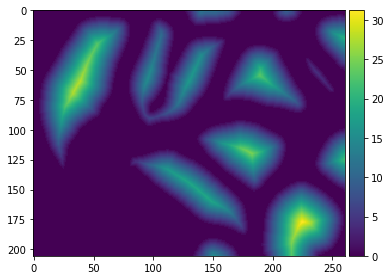

In [121]:
## label original
L, n = ndi.label(image)
print(n, "original segments found")

# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
euc_distance = ndi.distance_transform_edt(image)

imshow(euc_distance)
distance_between_peaks = 30
peaks = peak_local_max(euc_distance, indices=False, min_distance=distance_between_peaks,labels=image)
#imshow(peaks)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndi.label(peaks, structure=np.ones((3, 3)))[0]
labels = watershed(euc_distance, markers, mask=image)
print("{} unique segments found".format(len(np.unique(labels)) - 1))

#imshow(labels)


#imsave("watershed_output.tif", labels)
#imsave("distance_transform.png", D)



# remove small objects

[28903   478   193   826  5392  4269  2567   223  2865   877  3299  3456
   418]
[False  True False  True  True  True  True False  True  True  True  True
  True]


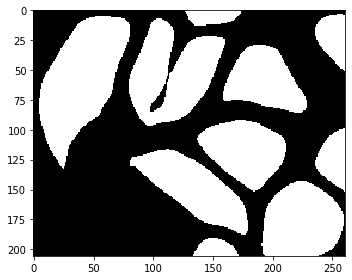

In [119]:
label_objects, nb_labels = ndi.label(euc_distance)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 250 #minimum size object deletion
mask_sizes[0] = 0 #Background?
cleaned = mask_sizes[label_objects]

imshow(cleaned)

print(sizes)
print(mask_sizes)


#### Iterative loop to trim down full stack using morphological opening

In [6]:
image_path = os.path.normpath("C:/Users/Nathan/Documents/data/fucci/labels_v5/")
output_path = os.path.normpath("C:/Users/Nathan/Documents/data/fucci/labels_v5_sexedup")
image_names = [f for f in os.listdir(image_path) if f.endswith('.tif')]
strength = 10 # number of iterations to perform 
kernel = np.ones((3,3),np.uint8)
for i, image_name in enumerate(image_names):
        image = imread(os.path.normpath(os.path.join(image_path, image_name))) 
        opening = cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel, iterations = strength)
        imsave(os.path.normpath(os.path.join(output_path, image_name)), opening)

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_0.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_1.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_10.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_100.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_1000.tif is a low contrast image
  if __name__ == '__main__':
C:\U

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_1045.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_1046.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_1047.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_1048.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_1049.tif is a low contrast image
  if __name__ == '__main

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_11.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_110.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_111.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_112.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_113.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_149.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_15.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_150.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_151.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_152.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_2.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_20.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_200.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_201.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_202.tif is a low contrast image
  if __name__ == '__main__':
C:\

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_241.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_242.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_243.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_244.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_245.tif is a low contrast image
  if __name__ == '__main__':


C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_287.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_288.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_289.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_29.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_290.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_326.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_327.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_328.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_329.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_33.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_368.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_369.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_37.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_370.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_371.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_413.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_414.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_415.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_416.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_417.tif is a low contrast image
  if __name__ == '__main__':


C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_459.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_46.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_460.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_461.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_462.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_496.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_497.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_498.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_499.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_5.tif is a low contrast image
  if __name__ == '__main__':
C:

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_536.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_537.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_538.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_539.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_54.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_58.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_580.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_581.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_582.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_583.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_626.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_627.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_628.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_629.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_63.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_667.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_668.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_669.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_67.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_670.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_703.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_704.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_705.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_706.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_707.tif is a low contrast image
  if __name__ == '__main__':


C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_745.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_746.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_747.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_748.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_749.tif is a low contrast image
  if __name__ == '__main__':


C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_787.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_788.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_789.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_79.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_790.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_841.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_842.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_843.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_844.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_845.tif is a low contrast image
  if __name__ == '__main__':


C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_880.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_881.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_882.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_883.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_884.tif is a low contrast image
  if __name__ == '__main__':


C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_918.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_919.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_92.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_920.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_921.tif is a low contrast image
  if __name__ == '__main__':
C

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_96.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_960.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_961.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_962.tif is a low contrast image
  if __name__ == '__main__':
C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: C:\Users\Nathan\Documents\data\fucci\labels_v5_sexedup\s_963.tif is a low contrast image
  if __name__ == '__main__':
C

### Morphological opening seems to trim cells down to size! 

C:\Users\Nathan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: opening.png is a low contrast image
  


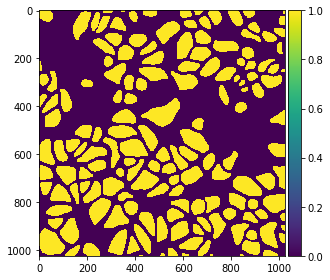

In [14]:
## first employ a morpholigical closing to fill any holes and a morphological opening to get rid of any negligible (noise) objects
#noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel, iterations = 5)
imshow(opening)
imsave("opening.png", opening)

### Labels each segment different value

In [ ]:
                 
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((1, 2)),labels=image)
print(np.ones((1, 2)))
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()
imsave("watershed_test.tif", labels)

# iterate over whole stack, applying E.D.T., erasure, removal small regions, then dilation

In [166]:
path = "/home/nathan/data/fucci"
image_dir = "labels_v5"
image_path = os.path.join(path, image_dir)
#image_name = "s_0.tif"
#image = imread(os.path.normpath(os.path.join(image_path, image_name)))
#imshow(image)
output_dir = "labels_v5_sexedup"
image_output_path = os.path.join(path, output_dir)

try:
    # Create target Directory
        os.mkdir(image_output_path)
        print("Directory " , image_output_path ,  " Created ") 
except FileExistsError:
        print("Directory " , image_output_path ,  " already exists")
        
images = [i for i in os.listdir(image_path) if i.endswith('.tif')]

for i in images: 
    image = imread(os.path.join(image_path, i))
    euc_distance = ndi.distance_transform_edt(image)
    min_distance = 6 #this parameter says that all regions <8 pixels from background will be erased
    refined_mask = np.zeros_like(euc_distance)
    refined_mask[euc_distance < min_distance] = 0 
    refined_mask[euc_distance > min_distance] = 1

    #imsave('distance_transform_erasure.png', refined_mask)

    label_objects, nb_labels = ndi.label(refined_mask)
    sizes = np.bincount(label_objects.ravel())
    mask_sizes = sizes > 250 #minimum size object deletion
    mask_sizes[0] = 0 #Background?
    cleaned = mask_sizes[label_objects]

    #imsave('dte_cleaned.tif', cleaned)

    #print(sizes)
    #print(mask_sizes)
    #imshow(refined_mask)

    dilated = ndi.morphology.binary_dilation(cleaned, iterations = 6)
    #imshow(dilated)
    image_output_path_fn = os.path.join(image_output_path, i)
    imsave(image_output_path_fn, dilated)




Directory  /home/nathan/data/fucci/labels_v5_sexedup  already exists


/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_431.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_998.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_564.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_385.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_843.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/li

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_580.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_433.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_711.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_859.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_284.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/li

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_977.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_839.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_290.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_741.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_210.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/li

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_232.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_332.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_467.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_627.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_764.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/li

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_864.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_401.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_577.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_392.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_116.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/li

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_993.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_358.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_947.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_415.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_30.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_189.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_438.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_29.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_33.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1050.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_836.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_620.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_909.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_769.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_8.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1049.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_623.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_185.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_63.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_75.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_553.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_840.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_787.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_842.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_516.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/li

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_208.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_742.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_20.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_78.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_354.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_639.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_829.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1014.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_562.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_605.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/l

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_917.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1043.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_231.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_834.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_875.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/l

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_447.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_88.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_835.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_215.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_724.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_122.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_991.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_96.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_753.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_823.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_923.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_67.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_121.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_616.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_98.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1006.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_844.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_871.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1063.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_846.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_888.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_941.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_249.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_298.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_166.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/li

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_962.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_221.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_24.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_304.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_765.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_105.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_308.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_615.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_93.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_687.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_484.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_736.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_987.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_144.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_396.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/li

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_514.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_211.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1085.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1058.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_233.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1074.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_659.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_862.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_163.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_625.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/l

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1021.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_314.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_54.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_418.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_61.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1016.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_302.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_44.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_578.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1029.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/l

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_791.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_575.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_647.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_1038.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: /home/nathan/data/fucci/labels_v5_sexedup/s_955.tif is a boolean image: setting True to 1 and False to 0
/home/nathan/anaconda3/l